## Attendance Analysis for Ligat Ha'al

**Here's an outline for a comprehensive Jupyter notebook that documents and explains the attendance analysis:**

- Data Loading and Setup
- Basic Statistics and Overview
- Visualizations
- Detailed Analysis
- Stadium Capacity and Utilization Analysis
- Competitive Balance Analysis
- Attendance Trends - Growth vs Decline
- Advanced Visualizations
- Attendance Forecasting


## Section 1–2: Data Loading, Setup & Basic Statistical Overview

This combined section loads, cleans, and merges all attendance datasets from multiple seasons, sets up the analysis environment, and produces an initial statistical overview. After importing necessary libraries and unifying the data into a single structured dataset, it extracts key season information and reports basic summaries such as total records and unique season counts. The section then computes fundamental attendance statistics—including averages, medians, and min/max values—along with season-level trends and rankings of the top and bottom teams by attendance, forming a clear baseline for deeper analysis.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Setup
ROOT = Path.cwd()
for _ in range(6):
    if (ROOT / 'data').exists():
        break
    ROOT = ROOT.parent

DATA_DIR = ROOT / 'data' / 'attendance'
REPORTS_DIR = ROOT / 'reports' / 'figures'
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("📊 Loading attendance data...\n")

# Load all attendance files except 2008/09
attendance_files = sorted(DATA_DIR.glob('attendance_*_ligat_haal_transfermarkt.csv'))
attendance_files = [f for f in attendance_files if '2008_09' not in str(f)]

print(f"📁 Found {len(attendance_files)} files to load:")
for f in attendance_files:
    print(f"   - {f.name}")

dfs = []
for file in attendance_files:
    df = pd.read_csv(file)
    # Remove duplicates within each file
    df = df.drop_duplicates(subset=['season', 'team'])
    dfs.append(df)
    print(f"  ✓ {file.name}: {len(df)} teams")

# Combine all data
df_attendance = pd.concat(dfs, ignore_index=True)

# Remove any duplicate rows across all combined data
df_attendance = df_attendance.drop_duplicates(subset=['season', 'team'])

df_attendance['season_year'] = df_attendance['season'].str.split('/').str[0].astype(int)

print(f"\n✅ Total records (after deduplication): {len(df_attendance)}")
print(f"   Seasons: {sorted(df_attendance['season'].unique())}")
print(f"   Teams: {df_attendance['team'].nunique()}")

# Verify teams per season
print("\n📊 Teams per season:")
teams_per_season = df_attendance.groupby('season').size()
for season, count in teams_per_season.items():
    print(f"   {season}: {count} teams")

# Display first rows
display(df_attendance.head(10))

print("\n" + "="*80)
print("📈 BASIC STATISTICS")
print("="*80)

# Overall stats
print(f"\nAverage attendance per team per season: {df_attendance['average_attendance'].mean():.0f}")
print(f"Median attendance per team per season: {df_attendance['average_attendance'].median():.0f}")
print(f"Max attendance: {df_attendance['average_attendance'].max():.0f}")
print(f"Min attendance: {df_attendance['average_attendance'].min():.0f}")

# By season
print("\n" + "-"*80)
print("📊 ATTENDANCE BY SEASON")
print("-"*80)

season_stats = df_attendance.groupby('season').agg({
    'average_attendance': ['mean', 'median', 'sum', 'count'],
    'total_spectators': 'sum'
}).round(0)

season_stats.columns = ['Avg Attendance', 'Median Attendance', 'Total Attendance', 'Teams', 'Total Spectators']
display(season_stats)

# Top 10 teams by average attendance
print("\n" + "-"*80)
print("🏆 TOP 10 TEAMS BY AVERAGE ATTENDANCE (ALL SEASONS)")
print("-"*80)

top_teams = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=False).head(10)
display(top_teams)

# Bottom 10 teams
print("\n" + "-"*80)
print("📉 BOTTOM 10 TEAMS BY AVERAGE ATTENDANCE")
print("-"*80)

bottom_teams = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=True).head(10)
display(bottom_teams)

# Most attended seasons
print("\n" + "-"*80)
print("🎯 MOST ATTENDED SEASONS")
print("-"*80)

season_totals = df_attendance.groupby('season')['total_spectators'].sum().sort_values(ascending=False)
display(season_totals)

📊 Loading attendance data...

📁 Found 20 files to load:
   - attendance_2006_07_ligat_haal_transfermarkt.csv
   - attendance_2007_08_ligat_haal_transfermarkt.csv
   - attendance_2009_10_ligat_haal_transfermarkt.csv
   - attendance_2010_11_ligat_haal_transfermarkt.csv
   - attendance_2011_12_ligat_haal_transfermarkt.csv
   - attendance_2012_13_ligat_haal_transfermarkt.csv
   - attendance_2013_14_ligat_haal_transfermarkt.csv
   - attendance_2014_15_ligat_haal_transfermarkt.csv
   - attendance_2015_16_ligat_haal_transfermarkt.csv
   - attendance_2016_17_ligat_haal_transfermarkt.csv
   - attendance_2017_18_ligat_haal_transfermarkt.csv
   - attendance_2018_19_ligat_haal_transfermarkt.csv
   - attendance_2019_20_ligat_haal_transfermarkt.csv
   - attendance_2020_21_ligat_haal_transfermarkt.csv
   - attendance_2021_22_ligat_haal_transfermarkt.csv
   - attendance_2022_23_ligat_haal_transfermarkt.csv
   - attendance_2023_24_ligat_haal_transfermarkt.csv
   - attendance_2024_25_ligat_haal_transfer

,season,team,stadium,capacity,total_spectators,average_attendance,season_year
0,2006/07,Bnei Yehuda Tel Aviv,Unknown,6020,49000,3063,2006
1,2006/07,Hapoel Tel Aviv,Unknown,29150,16000,5333,2006
2,2006/07,Hapoel Petah Tikva,Unknown,11500,10250,2050,2006
3,2006/07,Beitar Jerusalem,Unknown,33500,10000,10000,2006
4,2006/07,Maccabi Netanya,Unknown,13610,9250,3083,2006
5,2006/07,Maccabi Haifa,Unknown,30780,7700,3850,2006
6,2006/07,Hakoah Amidar Ramat Gan,Unknown,8000,6250,1250,2006
7,2006/07,Hapoel Kfar Saba,Unknown,5800,4500,2250,2006
8,2006/07,FC Ashdod,Unknown,8200,2500,2500,2006
9,2006/07,Maccabi Petah Tikva,Unknown,11500,2000,2000,2006



📈 BASIC STATISTICS

Average attendance per team per season: 5761
Median attendance per team per season: 3444
Max attendance: 28639
Min attendance: 0

--------------------------------------------------------------------------------
📊 ATTENDANCE BY SEASON
--------------------------------------------------------------------------------


,Avg Attendance,Median Attendance,Total Attendance,Teams,Total Spectators
season,,,,,
2006/07,3136.0,2375.0,37629,12,119700
2007/08,5738.0,4198.0,68853,12,362600
2008/09,0.0,0.0,0,12,0
2009/10,3926.0,2816.0,62821,16,939155
2010/11,4867.0,3334.0,77866,16,318450
2011/12,3891.0,2807.0,62252,16,911780
2012/13,5038.0,3900.0,70534,14,916940
2013/14,5444.0,3988.0,76218,14,970781
2014/15,7630.0,6310.0,106823,14,935937



--------------------------------------------------------------------------------
🏆 TOP 10 TEAMS BY AVERAGE ATTENDANCE (ALL SEASONS)
--------------------------------------------------------------------------------


team
Maccabi Haifa           15278.500000
Maccabi Tel Aviv        12319.350000
Beitar Jerusalem        10323.850000
Hapoel Beer Sheva        9657.764706
Hapoel Tel Aviv          9105.388889
Hapoel Haifa             5053.294118
Maccabi Netanya          4650.388889
Hapoel Jerusalem         3800.400000
Hapoel Petah Tikva       3217.125000
Bnei Yehuda Tel Aviv     3148.285714
Name: average_attendance, dtype: float64


--------------------------------------------------------------------------------
📉 BOTTOM 10 TEAMS BY AVERAGE ATTENDANCE
--------------------------------------------------------------------------------


team
Hakoah Amidar Ramat Gan     625.000000
Hapoel Ramat haSharon      1228.000000
Maccabi Ahi Nazareth       1237.000000
Maccabi Herzliya           1625.000000
Hapoel Nof HaGalil         1654.000000
Hapoel Ramat Gan           1701.333333
Hapoel Rishon leZion       1753.000000
Ironi Kiryat Shmona        1818.529412
Hapoel Raanana             1876.750000
Hapoel Acre                2117.875000
Name: average_attendance, dtype: float64


--------------------------------------------------------------------------------
🎯 MOST ATTENDED SEASONS
--------------------------------------------------------------------------------


season
2022/23    1533006
2019/20    1345409
2021/22    1313511
2015/16    1247497
2024/25    1245045
2018/19    1142281
2016/17    1139400
2023/24    1101572
2017/18    1079479
2013/14     970781
2009/10     939155
2014/15     935937
2012/13     916940
2011/12     911780
2025/26     618435
2007/08     362600
2010/11     318450
2006/07     119700
2020/21      24790
2008/09          0
Name: total_spectators, dtype: int64

## Section 3: Visualizations
This section creates seven different visualization charts to represent attendance data visually. It includes: (1) a bar chart showing average attendance per team by season, (2) a horizontal bar chart of the top 15 teams, (3) a histogram showing the distribution of attendance, (4) a trend line of total spectators over time, (5) multi-line plot tracking top 8 teams' attendance across seasons, (6) a box plot showing attendance distribution by season, and (7) a heatmap displaying top teams' attendance patterns. These visualizations make patterns and outliers easier to identify.


📈 VISUALIZATIONS


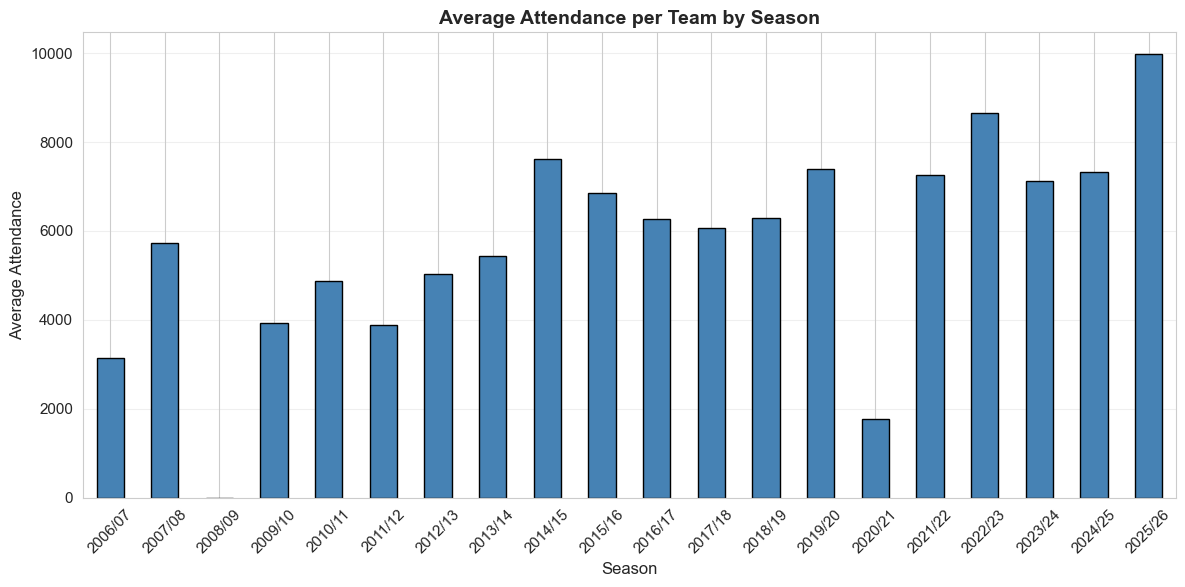

✓ Saved: attendance_by_season.png


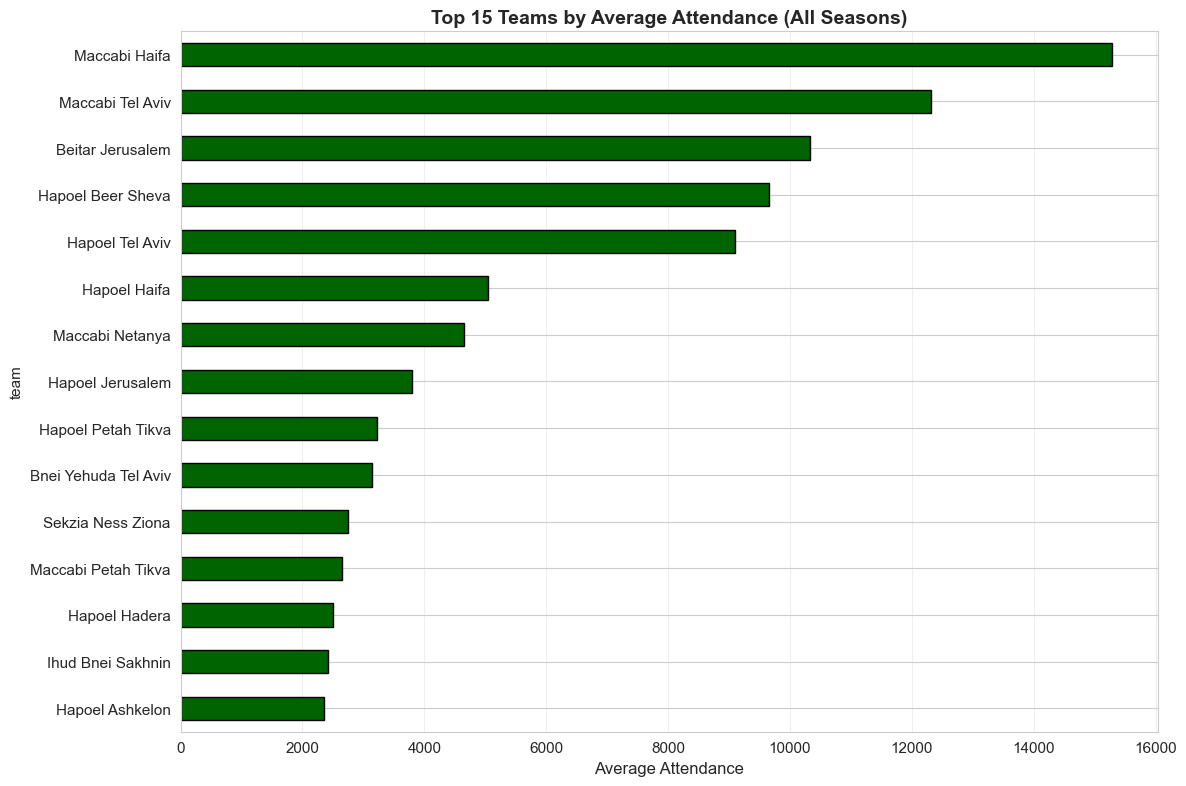

✓ Saved: top_teams_attendance.png


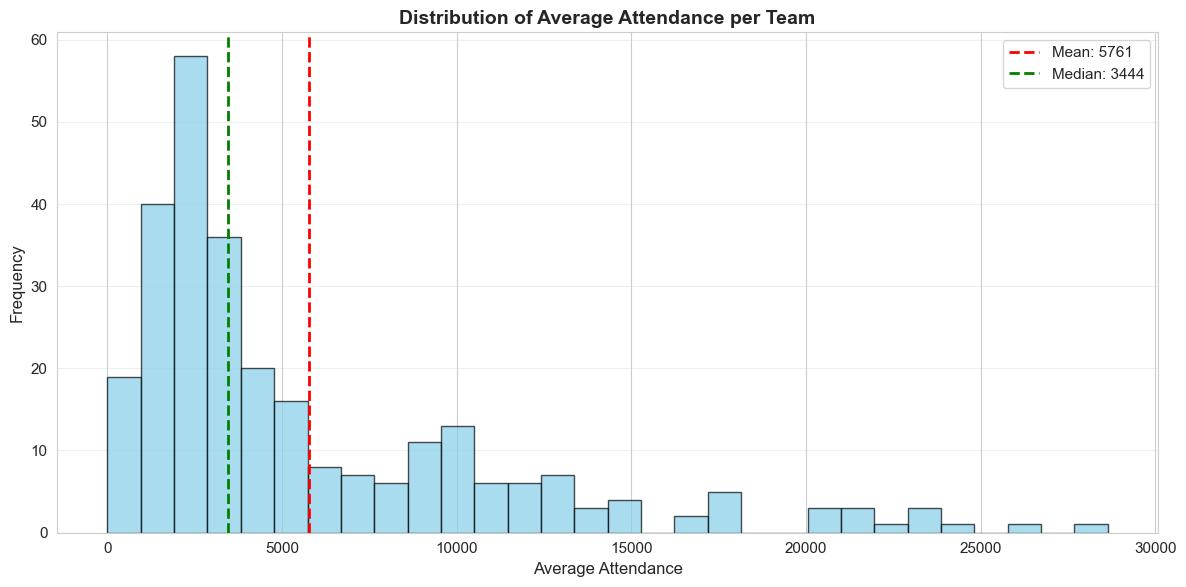

✓ Saved: attendance_distribution.png


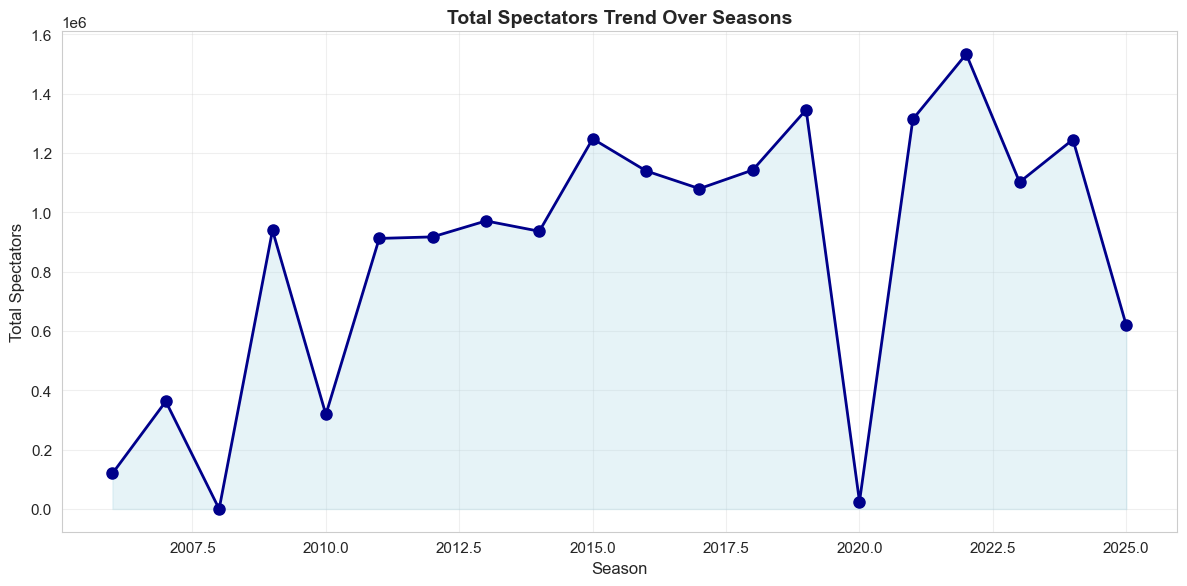

✓ Saved: spectators_trend.png


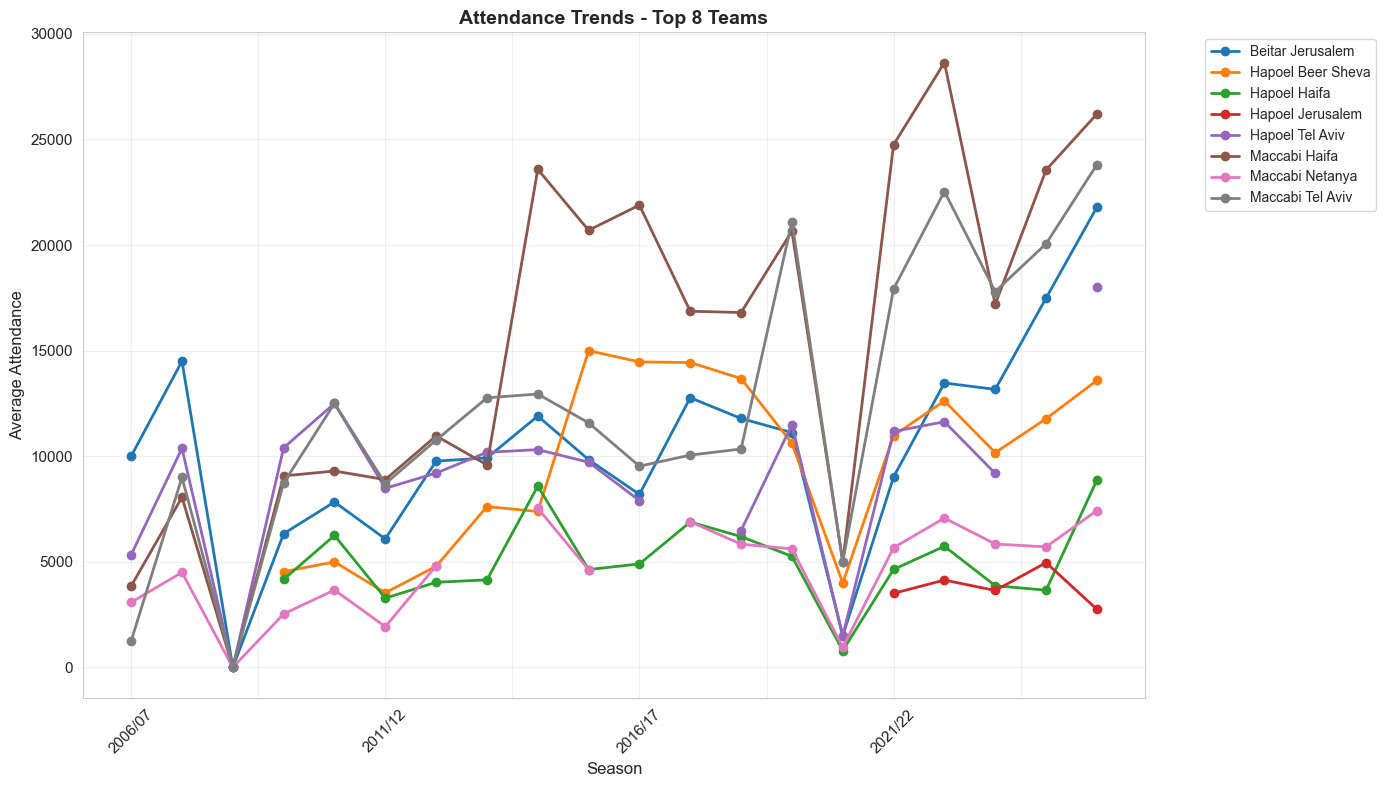

✓ Saved: top_teams_trends.png


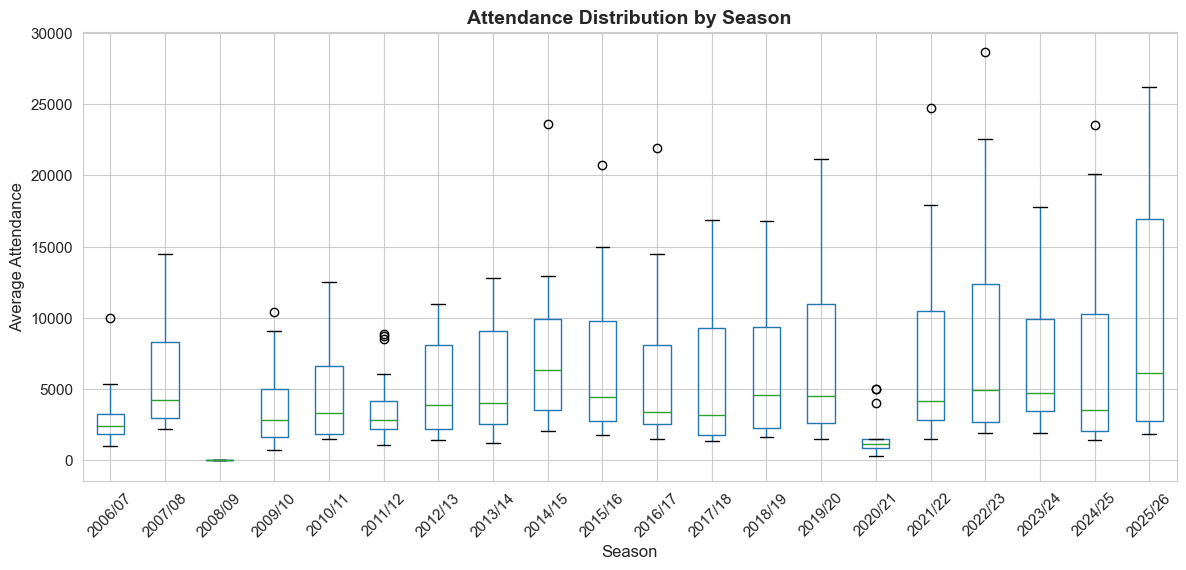

✓ Saved: attendance_boxplot.png


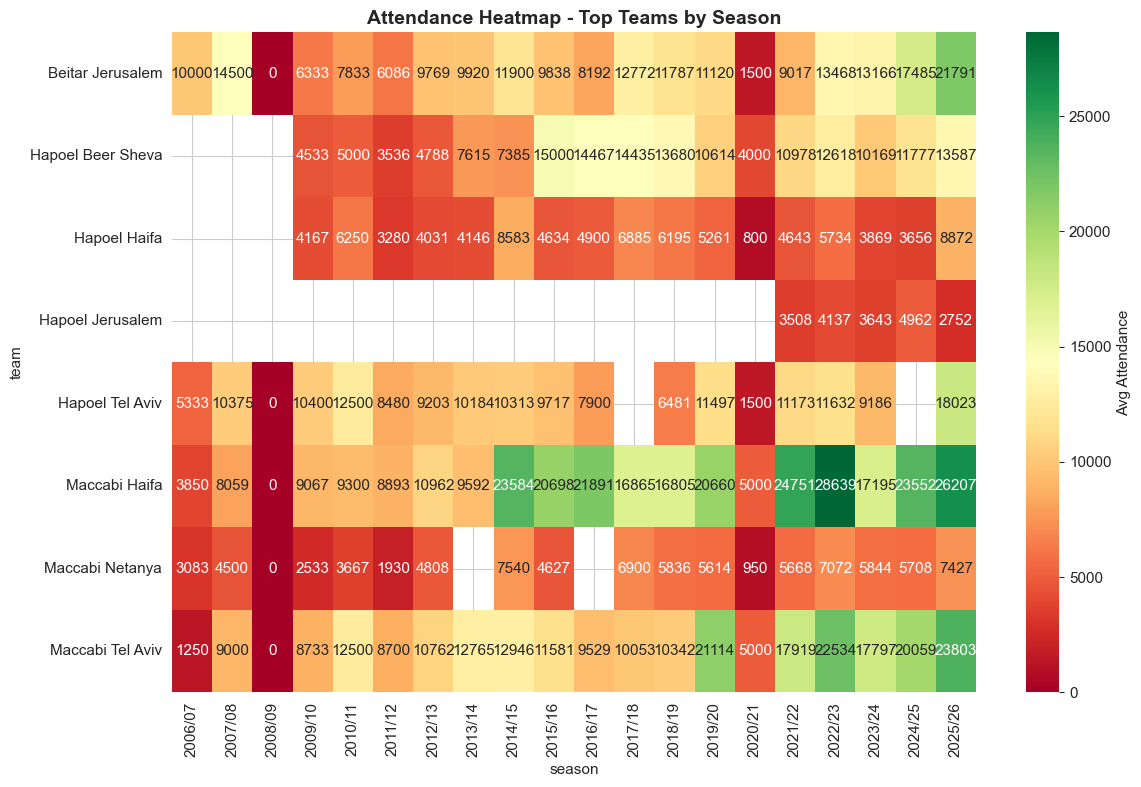

✓ Saved: attendance_heatmap.png

✅ All visualizations saved to: c:\Users\idant\Desktop\final project\ligat_haal_project\ligat_haal_project\notebooks\reports\figures


In [15]:
print("\n" + "="*80)
print("📈 VISUALIZATIONS")
print("="*80)

# 1. Average attendance by season
fig, ax = plt.subplots(figsize=(12, 6))
season_avg = df_attendance.groupby('season')['average_attendance'].mean()
season_avg.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Average Attendance per Team by Season', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_by_season.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_by_season.png")

# 2. Top 15 teams by average attendance
fig, ax = plt.subplots(figsize=(12, 8))
top_15 = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=True).tail(15)
top_15.plot(kind='barh', ax=ax, color='darkgreen', edgecolor='black')
ax.set_title('Top 15 Teams by Average Attendance (All Seasons)', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Attendance', fontsize=12)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'top_teams_attendance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: top_teams_attendance.png")

# 3. Distribution of attendance
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_attendance['average_attendance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(df_attendance['average_attendance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_attendance["average_attendance"].mean():.0f}')
ax.axvline(df_attendance['average_attendance'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_attendance["average_attendance"].median():.0f}')
ax.set_title('Distribution of Average Attendance per Team', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Attendance', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_distribution.png")

# 4. Total spectators by season (trend)
fig, ax = plt.subplots(figsize=(12, 6))
season_totals = df_attendance.groupby('season_year')['total_spectators'].sum()
ax.plot(season_totals.index, season_totals.values, marker='o', linewidth=2, markersize=8, color='darkblue')
ax.fill_between(season_totals.index, season_totals.values, alpha=0.3, color='lightblue')
ax.set_title('Total Spectators Trend Over Seasons', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Total Spectators', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'spectators_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: spectators_trend.png")

# 5. Attendance by team across seasons (top teams)
fig, ax = plt.subplots(figsize=(14, 8))
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(8).index
pivot_data = df_attendance[df_attendance['team'].isin(top_teams_list)].pivot_table(
    values='average_attendance', 
    index='season', 
    columns='team', 
    aggfunc='mean'
)
pivot_data.plot(ax=ax, marker='o', linewidth=2)
ax.set_title('Attendance Trends - Top 8 Teams', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'top_teams_trends.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: top_teams_trends.png")

# 6. Box plot - attendance by season
fig, ax = plt.subplots(figsize=(12, 6))
df_attendance.boxplot(column='average_attendance', by='season', ax=ax)
ax.set_title('Attendance Distribution by Season', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_boxplot.png")

# 7. Heatmap - top teams attendance by season
fig, ax = plt.subplots(figsize=(12, 8))
heatmap_data = df_attendance[df_attendance['team'].isin(top_teams_list)].pivot_table(
    values='average_attendance',
    index='team',
    columns='season'
)
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlGn', ax=ax, cbar_kws={'label': 'Avg Attendance'})
ax.set_title('Attendance Heatmap - Top Teams by Season', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_heatmap.png")

print("\n✅ All visualizations saved to: " + str(REPORTS_DIR))

## Section 4: Detailed Analysis
This section digs deeper into attendance dynamics by calculating season-to-season growth percentages, identifying teams with the highest average attendance, measuring attendance consistency using standard deviation, and highlighting the most variable attendance patterns. It provides insights into which teams maintain stable fan bases versus those with volatile attendance, helping identify both consistent performers and unpredictable markets.

In [16]:
print("\n" + "="*80)
print("🔍 DETAILED ANALYSIS")
print("="*80)

# Growth/decline analysis
print("\n📊 SEASON-TO-SEASON GROWTH")
print("-"*80)

season_avg_yearly = df_attendance.groupby('season_year')['average_attendance'].mean()
growth = season_avg_yearly.pct_change() * 100

for year, pct in growth.items():
    if pd.notna(pct):
        direction = "📈" if pct > 0 else "📉"
        print(f"  {year-1}/{year%100:02d} → {year}/{year+1%100:02d}: {direction} {pct:+.1f}%")

# Teams with highest growth
print("\n🚀 TEAMS WITH HIGHEST AVERAGE ATTENDANCE")
print("-"*80)

team_avg = df_attendance.groupby('team')['average_attendance'].mean().sort_values(ascending=False)
for i, (team, avg) in enumerate(team_avg.head(5).items(), 1):
    print(f"  {i}. {team}: {avg:.0f}")

# Consistency analysis
print("\n📈 MOST CONSISTENT ATTENDANCE (Low variance)")
print("-"*80)

team_std = df_attendance.groupby('team')['average_attendance'].std().sort_values()
for i, (team, std) in enumerate(team_std.head(5).items(), 1):
    print(f"  {i}. {team}: σ = {std:.0f}")

# Most variable
print("\n📊 MOST VARIABLE ATTENDANCE (High variance)")
print("-"*80)

for i, (team, std) in enumerate(team_std.tail(5).sort_values(ascending=False).items(), 1):
    print(f"  {i}. {team}: σ = {std:.0f}")

print("\n" + "="*80)


🔍 DETAILED ANALYSIS

📊 SEASON-TO-SEASON GROWTH
--------------------------------------------------------------------------------
  2006/07 → 2007/2008: 📈 +83.0%
  2007/08 → 2008/2009: 📉 -100.0%
  2008/09 → 2009/2010: 📈 +inf%
  2009/10 → 2010/2011: 📈 +23.9%
  2010/11 → 2011/2012: 📉 -20.1%
  2011/12 → 2012/2013: 📈 +29.5%
  2012/13 → 2013/2014: 📈 +8.1%
  2013/14 → 2014/2015: 📈 +40.2%
  2014/15 → 2015/2016: 📉 -10.2%
  2015/16 → 2016/2017: 📉 -8.7%
  2016/17 → 2017/2018: 📉 -3.0%
  2017/18 → 2018/2019: 📈 +3.7%
  2018/19 → 2019/2020: 📈 +17.4%
  2019/20 → 2020/2021: 📉 -76.0%
  2020/21 → 2021/2022: 📈 +310.4%
  2021/22 → 2022/2023: 📈 +19.1%
  2022/23 → 2023/2024: 📉 -17.7%
  2023/24 → 2024/2025: 📈 +3.0%
  2024/25 → 2025/2026: 📈 +35.9%

🚀 TEAMS WITH HIGHEST AVERAGE ATTENDANCE
--------------------------------------------------------------------------------
  1. Maccabi Haifa: 15278
  2. Maccabi Tel Aviv: 12319
  3. Beitar Jerusalem: 10324
  4. Hapoel Beer Sheva: 9658
  5. Hapoel Tel Aviv: 9105

📈 MO

## Section 5: Utility Functions & Helper Functions
This section defines two important statistical functions used throughout the analysis. The calculate_gini() function computes the Gini Coefficient, a measure of inequality in attendance distribution (0 = perfect equality, 1 = perfect inequality). The calculate_hhi() function computes the Herfindahl-Hirschman Index to measure market dominance. Additionally, it initializes global variables that will be reused in subsequent analyses, such as identifying the top 8 teams and filtering data with valid stadium capacity information.

In [17]:
# ============================================================================
# 🔧 UTILITIES & HELPER FUNCTIONS (בתחילת הקובץ, אחרי imports)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון (0=שוויון, 1=אי-שוויון מלא)"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

def calculate_hhi(x):
    """חישוב HHI Index - מדד דומיננס (1000+=בעיה, <1000=תחרותי)"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

# טבלה גלובלית שנשתמש בה בכמה מקומות
TOP_TEAMS_COUNT = 8
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(TOP_TEAMS_COUNT).index

print("✅ Utilities loaded successfully")# ============================================================================
# 🔧 UTILITIES & HELPER FUNCTIONS (בתחילת הקובץ, אחרי imports)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון (0=שוויון, 1=אי-שוויון מלא)"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

def calculate_hhi(x):
    """חישוב HHI Index - מדד דומיננס (1000+=בעיה, <1000=תחרותי)"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

# טבלה גלובלית שנשתמש בה בכמה מקומות
TOP_TEAMS_COUNT = 8
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(TOP_TEAMS_COUNT).index

print("✅ Utilities loaded successfully")# ============================================================================
# 🔧 UTILITIES & HELPER FUNCTIONS (בתחילת הקובץ, אחרי imports)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון (0=שוויון, 1=אי-שוויון מלא)"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

def calculate_hhi(x):
    """חישוב HHI Index - מדד דומיננס (1000+=בעיה, <1000=תחרותי)"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

# טבלה גלובלית שנשתמש בה בכמה מקומות
TOP_TEAMS_COUNT = 8
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(TOP_TEAMS_COUNT).index

print("✅ Utilities loaded successfully")# ============================================================================
# 🔧 UTILITIES & HELPER FUNCTIONS (בתחילת הקובץ, אחרי imports)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון (0=שוויון, 1=אי-שוויון מלא)"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

def calculate_hhi(x):
    """חישוב HHI Index - מדד דומיננס (1000+=בעיה, <1000=תחרותי)"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

# טבלה גלובלית שנשתמש בה בכמה מקומות
TOP_TEAMS_COUNT = 8
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(TOP_TEAMS_COUNT).index

print("✅ Utilities loaded successfully")# ============================================================================
# 🔧 UTILITIES & HELPER FUNCTIONS (בתחילת הקובץ, אחרי imports)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון (0=שוויון, 1=אי-שוויון מלא)"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

def calculate_hhi(x):
    """חישוב HHI Index - מדד דומיננס (1000+=בעיה, <1000=תחרותי)"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

# טבלה גלובלית שנשתמש בה בכמה מקומות
TOP_TEAMS_COUNT = 8
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(TOP_TEAMS_COUNT).index

print("✅ Utilities loaded successfully")# ============================================================================
# 🎯 SECTION 1: STADIUM CAPACITY & UTILIZATION ANALYSIS
# ============================================================================
# ניתוח ניצול קיבול האצטדיון - האם קבוצות משחקות במלא כוח?
# ============================================================================

print("\n" + "="*80)
print("🏟️  STADIUM CAPACITY & UTILIZATION ANALYSIS")
print("="*80)

# חישוב יעילות השימוש בקיבול
df_attendance['capacity_utilization'] = (
    (df_attendance['average_attendance'] / df_attendance['capacity'] * 100)
    .round(1)
)

# הסרת שורות ללא קיבול
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()

print(f"\n📊 סטטיסטיקות קיבול אצטדיון:")
print("-"*80)
print(f"  ממוצע קיבול: {df_with_capacity['capacity'].mean():.0f}")
print(f"  מקסימום קיבול: {df_with_capacity['capacity'].max():.0f}")
print(f"  מינימום קיבול: {df_with_capacity['capacity'].min():.0f}")

print(f"\n📊 סטטיסטיקות ניצול קיבול:")
print("-"*80)
print(f"  ממוצע ניצול: {df_with_capacity['capacity_utilization'].mean():.1f}%")
print(f"  חציון ניצול: {df_with_capacity['capacity_utilization'].median():.1f}%")
print(f"  מקסימום ניצול: {df_with_capacity['capacity_utilization'].max():.1f}%")
print(f"  מינימום ניצול: {df_with_capacity['capacity_utilization'].min():.1f}%")

# ============================================================================
# 🎯 קבוצות עם ניצול קיבול גבוה (אצטדיון תמיד מלא!)
# ============================================================================

print(f"\n✅ קבוצות עם ניצול קיבול גבוה (בממוצע)")
print("-"*80)

high_utilization = df_with_capacity.groupby('team').agg({
    'capacity': 'first',
    'average_attendance': 'mean',
    'capacity_utilization': 'mean'
}).round(1)

high_utilization = high_utilization[high_utilization['capacity_utilization'] > 0].sort_values(
    'capacity_utilization', ascending=False
).head(10)

for team, row in high_utilization.iterrows():
    print(f"  {team}")
    print(f"    קיבול: {row['capacity']:.0f} | נוכחות: {row['average_attendance']:.0f} | ניצול: {row['capacity_utilization']:.1f}%")

# ============================================================================
# ⚠️  קבוצות עם ניצול קיבול נמוך (אצטדיון מדי גדול)
# ============================================================================

print(f"\n⚠️  קבוצות עם ניצול קיבול נמוך (אצטדיון לא מנוצל)")
print("-"*80)

low_utilization = df_with_capacity.groupby('team').agg({
    'capacity': 'first',
    'average_attendance': 'mean',
    'capacity_utilization': 'mean'
}).round(1)

low_utilization = low_utilization[low_utilization['capacity_utilization'] > 0].sort_values(
    'capacity_utilization', ascending=True
).head(10)

for team, row in low_utilization.iterrows():
    print(f"  {team}")
    print(f"    קיבול: {row['capacity']:.0f} | נוכחות: {row['average_attendance']:.0f} | ניצול: {row['capacity_utilization']:.1f}%")

display(high_utilization)
display(low_utilization)

✅ Utilities loaded successfully
✅ Utilities loaded successfully
✅ Utilities loaded successfully
✅ Utilities loaded successfully
✅ Utilities loaded successfully

🏟️  STADIUM CAPACITY & UTILIZATION ANALYSIS

📊 סטטיסטיקות קיבול אצטדיון:
--------------------------------------------------------------------------------
  ממוצע קיבול: 17555
  מקסימום קיבול: 41583
  מינימום קיבול: 3000

📊 סטטיסטיקות ניצול קיבול:
--------------------------------------------------------------------------------
  ממוצע ניצול: 34.7%
  חציון ניצול: 30.5%
  מקסימום ניצול: 114.0%
  מינימום ניצול: 0.0%

✅ קבוצות עם ניצול קיבול גבוה (בממוצע)
--------------------------------------------------------------------------------
  Hapoel Hadera
    קיבול: 3000 | נוכחות: 2503 | ניצול: 83.4%
  Sekzia Ness Ziona
    קיבול: 3500 | נוכחות: 2754 | ניצול: 78.7%
  Hapoel Beer Sheva
    קיבול: 16126 | נוכחות: 9658 | ניצול: 59.9%
  Bnei Yehuda Tel Aviv
    קיבול: 6020 | נוכחות: 3148 | ניצול: 52.3%
  Maccabi Haifa
    קיבול: 30780 | נוכח

,capacity,average_attendance,capacity_utilization
team,,,
Hapoel Hadera,3000,2503.0,83.4
Sekzia Ness Ziona,3500,2754.5,78.7
Hapoel Beer Sheva,16126,9657.8,59.9
Bnei Yehuda Tel Aviv,6020,3148.3,52.3
Maccabi Haifa,30780,15278.5,49.6
Maccabi Bnei Reineh,5200,2210.5,42.5
Hapoel Acre,5000,2117.9,42.4
Maccabi Tel Aviv,29150,12319.4,42.3
Ironi Tiberias,5200,2177.0,41.8


,capacity,average_attendance,capacity_utilization
team,,,
Hapoel Ramat Gan,41583,1701.3,4.1
Hakoah Amidar Ramat Gan,8000,625.0,7.8
Hapoel Jerusalem,33500,3800.4,11.3
Maccabi Herzliya,13800,1625.0,11.8
Ironi Kiryat Shmona,13800,1818.5,13.2
Hapoel Haifa,30820,5053.3,16.4
Maccabi Petah Tikva,11500,2655.6,23.1
Hapoel Ashkelon,10000,2350.0,23.5
Maccabi Ahi Nazareth,4932,1237.0,25.1


## Section 6: Competitive Balance Analysis
This section assesses the balance of competition in the league by measuring inequality in attendance. Using the Gini Coefficient, it evaluates whether the league has many teams with similar attendance levels (high competition, low Gini) or a few dominant teams (poor competition, high Gini). The HHI Index measures market dominance to identify if a small number of teams monopolize fan attendance. Market share analysis of the top 2 teams shows how much of the league's total spectators are concentrated in the biggest clubs, indicating competitive health.

In [18]:
# ============================================================================
# 🏆 SECTION 2: COMPETITIVE BALANCE ANALYSIS
# ============================================================================
# ניתוח איזון תחרותי - האם יש קבוצות דומיננטיות?
# ============================================================================

print("\n" + "="*80)
print("⚖️  COMPETITIVE BALANCE ANALYSIS")
print("="*80)

# ============================================================================
# 📊 Gini Coefficient - מדד אי-שוויון בנוכחות
# ============================================================================
# ערך 0 = שוויון מושלם (כל קבוצה משכה אותו מספר צופים)
# ערך 1 = אי-שוויון מושלם (קבוצה אחת משכה הכל)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

print(f"\n📊 מדד אי-שוויון (Gini Coefficient):")
print("-"*80)

gini_by_season = df_attendance.groupby('season')['average_attendance'].apply(calculate_gini).round(3)

for season, gini in gini_by_season.items():
    balance_level = "✅ שוויוני" if gini < 0.35 else "⚠️  בינוני" if gini < 0.4 else "❌ לא שוויוני"
    print(f"  {season}: {gini:.3f} {balance_level}")

# ============================================================================
# 🏅 HHI Index - Herfindahl-Hirschman Index
# ============================================================================
# משמעות: כמה קבוצות "שולטות" בליגה
# ערך גבוה = קבוצות מעטות שולטות, ערך נמוך = תחרות גבוהה
# ============================================================================

def calculate_hhi(x):
    """חישוב HHI - דומיננס שוק"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

print(f"\n🏆 מדד דומיננס (HHI Index):")
print("-"*80)

hhi_by_season = df_attendance.groupby('season')['average_attendance'].apply(calculate_hhi).round(1)

for season, hhi in hhi_by_season.items():
    dominance = "🔴 דומיננטי" if hhi > 1500 else "🟡 בינוני" if hhi > 1000 else "🟢 תחרותי"
    print(f"  {season}: {hhi:.1f} {dominance}")

# ============================================================================
# 📈 Market Share - חלוקת הצופים בין הקבוצות
# ============================================================================

print(f"\n📊 שתי קבוצות מובילות - כמה צופים הם משכו?")
print("-"*80)

for season in sorted(df_attendance['season'].unique())[-5:]:  # 5 עונות אחרונות
    season_data = df_attendance[df_attendance['season'] == season].sort_values(
        'total_spectators', ascending=False
    )
    
    top_2_total = season_data.head(2)['total_spectators'].sum()
    season_total = season_data['total_spectators'].sum()
    
    if season_total > 0:
        market_share = (top_2_total / season_total * 100)
        print(f"  {season}: {market_share:.1f}% מסך הצופים")


⚖️  COMPETITIVE BALANCE ANALYSIS

📊 מדד אי-שוויון (Gini Coefficient):
--------------------------------------------------------------------------------
  2006/07: 0.360 ⚠️  בינוני
  2007/08: 0.340 ✅ שוויוני
  2008/09: nan ❌ לא שוויוני
  2009/10: 0.405 ❌ לא שוויוני
  2010/11: 0.395 ⚠️  בינוני
  2011/12: 0.334 ✅ שוויוני
  2012/13: 0.364 ⚠️  בינוני
  2013/14: 0.368 ⚠️  בינוני
  2014/15: 0.371 ⚠️  בינוני
  2015/16: 0.416 ❌ לא שוויוני
  2016/17: 0.441 ❌ לא שוויוני
  2017/18: 0.455 ❌ לא שוויוני
  2018/19: 0.407 ❌ לא שוויוני
  2019/20: 0.449 ❌ לא שוויוני
  2020/21: 0.439 ❌ לא שוויוני
  2021/22: 0.466 ❌ לא שוויוני
  2022/23: 0.468 ❌ לא שוויוני
  2023/24: 0.397 ⚠️  בינוני
  2024/25: 0.502 ❌ לא שוויוני
  2025/26: 0.465 ❌ לא שוויוני

🏆 מדד דומיננס (HHI Index):
--------------------------------------------------------------------------------
  2006/07: 1312.1 🟡 בינוני
  2007/08: 1183.2 🟡 בינוני
  2008/09: 0.0 🟢 תחרותי
  2009/10: 986.2 🟢 תחרותי
  2010/11: 976.0 🟢 תחרותי
  2011/12: 891.4 🟢 תחרותי
  2

## Section 7: Strategic League Insights
This section provides high-level strategic analysis of the league's attendance dynamics. It examines how league size affects attendance (correlation between number of teams and average attendance), measures the attendance gap between large and small teams, identifies growth leaders and declining teams, and tracks inequality trends over time. These insights help understand structural challenges and opportunities in the league's development.

In [ ]:
# ============================================================================
# 🔮 SECTION 7: LEAGUE INSIGHTS & STRATEGIC RECOMMENDATIONS
# ============================================================================
# תובנות ותוכיות לשיפור
# ============================================================================

print("\n" + "="*80)
print("💡 KEY INSIGHTS & STRATEGIC ANALYSIS")
print("="*80)

# ============================================================================
# 🎯 1. League Size Impact
# ============================================================================

print(f"\n1️⃣  השפעת גדלות הליגה על נוכחות:")
print("-"*80)

league_size_impact = df_attendance.groupby('season').agg({
    'team': 'count',
    'average_attendance': 'mean',
    'total_spectators': 'sum'
}).round(0)

league_size_impact.columns = ['Num_Teams', 'Avg_Per_Team', 'Total']

print(league_size_impact)

# חישוב קורלציה
correlation = league_size_impact['Num_Teams'].corr(league_size_impact['Avg_Per_Team'])
print(f"\nקורלציה בין גדלות הליגה לנוכחות ממוצעת: {correlation:.3f}")
if correlation < -0.3:
    print("  ➜ ככל שהליגה גדלה, הנוכחות הממוצעת יורדת (יותר קבוצות חלשות)")
elif correlation > 0.3:
    print("  ➜ ככל שהליגה גדלה, הנוכחות הממוצעת עולה")
else:
    print("  ➜ אין קורלציה חזקה")

# ============================================================================
# 🎯 2. "Big vs Small" Teams
# ============================================================================

print(f"\n2️⃣  פער בין קבוצות גדולות לקטנות:")
print("-"*80)

team_avg = df_attendance.groupby('team')['average_attendance'].mean()
top_3_avg = team_avg.nlargest(3).mean()
bottom_3_avg = team_avg.nsmallest(3).mean()

gap = top_3_avg / bottom_3_avg

print(f"  3 קבוצות עליונות: {top_3_avg:.0f} צופים בממוצע")
print(f"  3 קבוצות תחתונות: {bottom_3_avg:.0f} צופים בממוצע")
print(f"  פער: {gap:.1f}x")
print(f"\n  ➜ הקבוצות הגדולות משכות {gap:.1f} פעמים יותר צופים!")

# ============================================================================
# 🎯 3. Attendance Growth Leaders vs Decliners
# ============================================================================

print(f"\n3️⃣  קבוצות עם השינוי הגדול ביותר:")
print("-"*80)

first_last_seasons = df_attendance.groupby('team').agg({
    'season_year': ['min', 'max'],
    'average_attendance': ['first', 'last']
}).round(0)

first_last_seasons.columns = ['first_year', 'last_year', 'first_att', 'last_att']
first_last_seasons = first_last_seasons[(first_last_seasons['first_year'] < 2015) & (first_last_seasons['last_year'] > 2017)]

first_last_seasons['change'] = first_last_seasons['last_att'] - first_last_seasons['first_att']
first_last_seasons['pct_change'] = (first_last_seasons['change'] / first_last_seasons['first_att'] * 100).round(1)

print("\n📈 קבוצות שגדלו:")
for team, row in first_last_seasons.nlargest(3, 'change').iterrows():
    print(f"  {team}: {row['first_att']:.0f} → {row['last_att']:.0f} ({row['pct_change']:+.1f}%)")

print("\n📉 קבוצות שהתכווצו:")
for team, row in first_last_seasons.nsmallest(3, 'change').iterrows():
    print(f"  {team}: {row['first_att']:.0f} → {row['last_att']:.0f} ({row['pct_change']:+.1f}%)")

# ============================================================================
# 🎯 4. League Inequality Trends
# ============================================================================

print(f"\n4️⃣  מגמת אי-שוויון בליגה:")
print("-"*80)

gini_trend = df_attendance.groupby('season_year')['average_attendance'].apply(calculate_gini).round(3)

print("עונות עם אי-שוויון גדול (מונופול צופים):")
for year, gini in gini_trend.nlargest(3).items():
    print(f"  {year}: Gini = {gini:.3f}")

print("\nעונות עם אי-שוויון קטן (שוויוני יותר):")
for year, gini in gini_trend.nsmallest(3).items():
    print(f"  {year}: Gini = {gini:.3f}")

print("\n" + "="*80)


💡 KEY INSIGHTS & STRATEGIC ANALYSIS

1️⃣  השפעת גדלות הליגה על נוכחות:
--------------------------------------------------------------------------------
         Num_Teams  Avg_Per_Team    Total
season                                   
2006/07         12        3136.0   119700
2007/08         12        5738.0   362600
2008/09         12           0.0        0
2009/10         16        3926.0   939155
2010/11         16        4867.0   318450
2011/12         16        3891.0   911780
2012/13         14        5038.0   916940
2013/14         14        5444.0   970781
2014/15         14        7630.0   935937
2015/16         14        6854.0  1247497
2016/17         14        6261.0  1139400
2017/18         14        6072.0  1079479
2018/19         14        6298.0  1142281
2019/20         14        7392.0  1345409
2020/21         14        1771.0    24790
2021/22         14        7267.0  1313511
2022/23         14        8654.0  1533006
2023/24         14        7121.0  1101572
2024/25

## Section 8: Advanced Visualizations
This section creates sophisticated visualization charts including: (1) a scatter plot comparing stadium capacity against actual attendance with color coding by season, (2) a trend line showing how league inequality (Gini) changes over years with warning thresholds, (3) a bar chart tracking the market share of the top 2 teams across seasons, and (4) an engagement score visualization. These advanced visualizations reveal deeper patterns about stadium efficiency, competitive balance trends, and overall league health metrics.

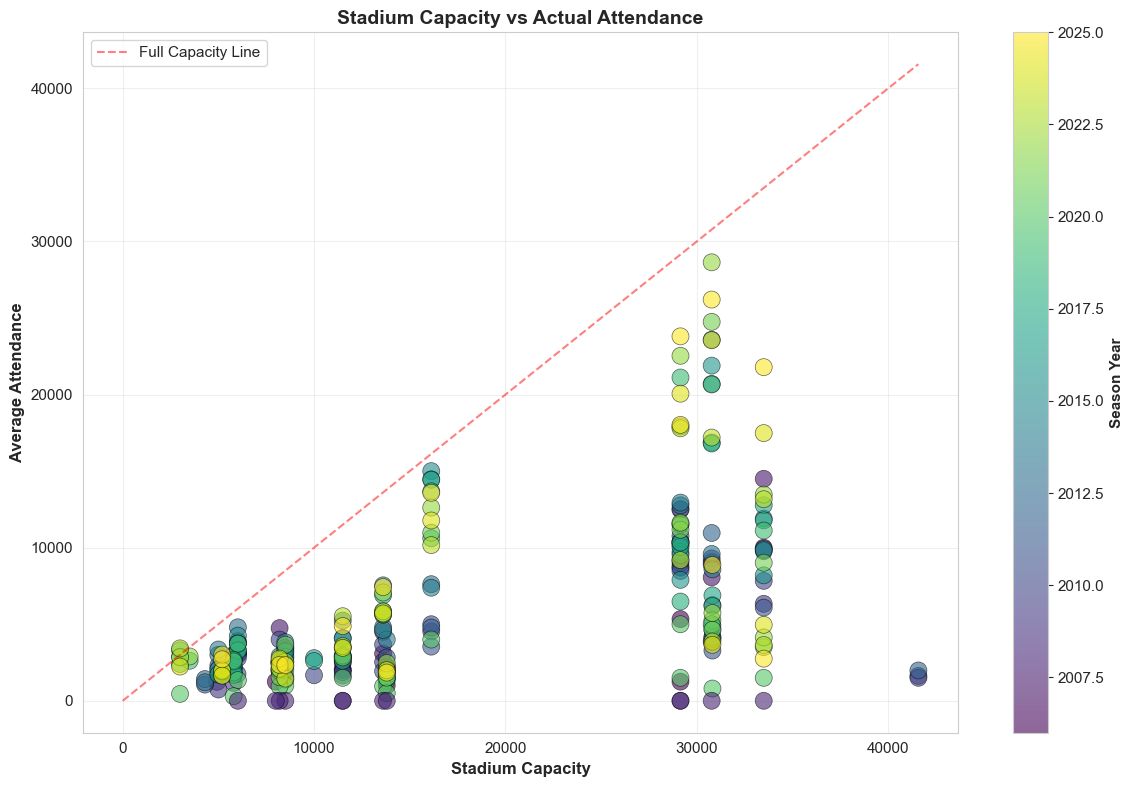

✓ Saved: capacity_vs_attendance.png


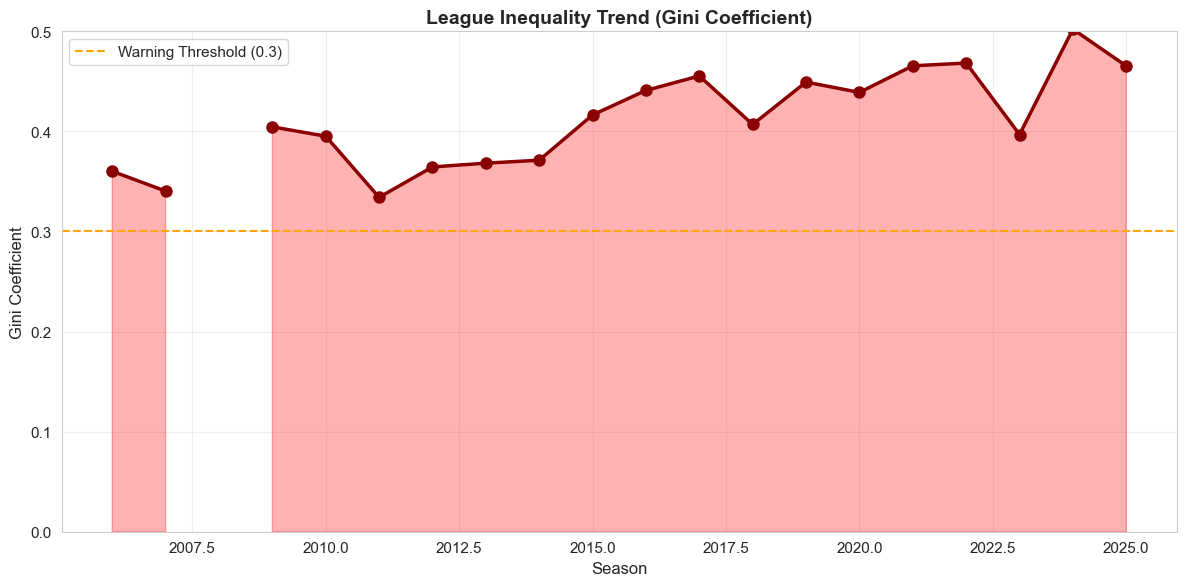

✓ Saved: gini_coefficient_trend.png


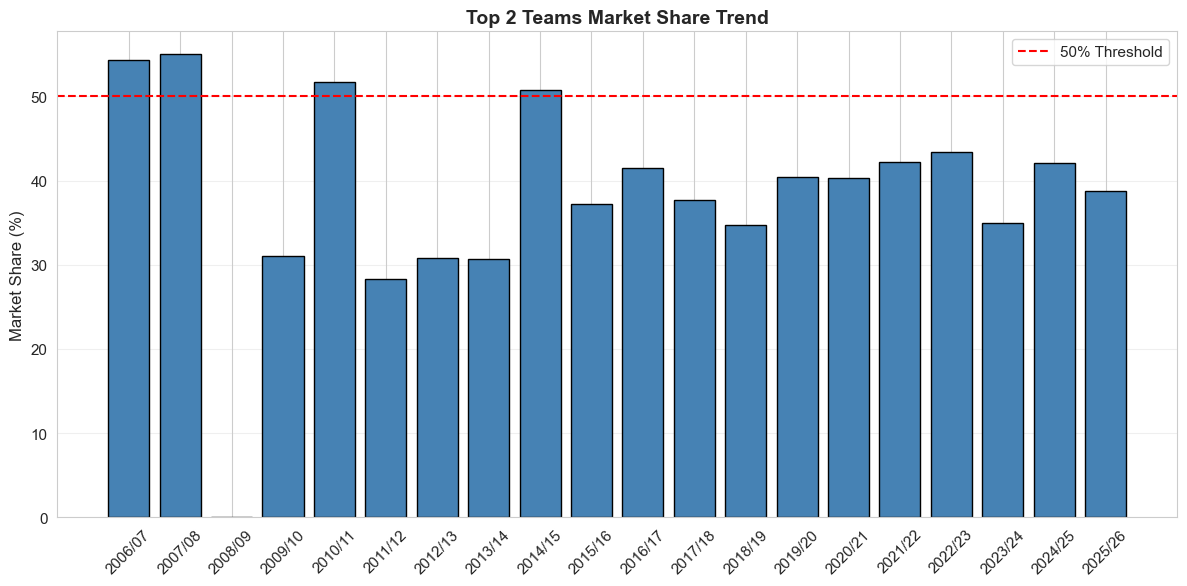

✓ Saved: top_2_market_share.png


NameError: name 'season_metrics' is not defined

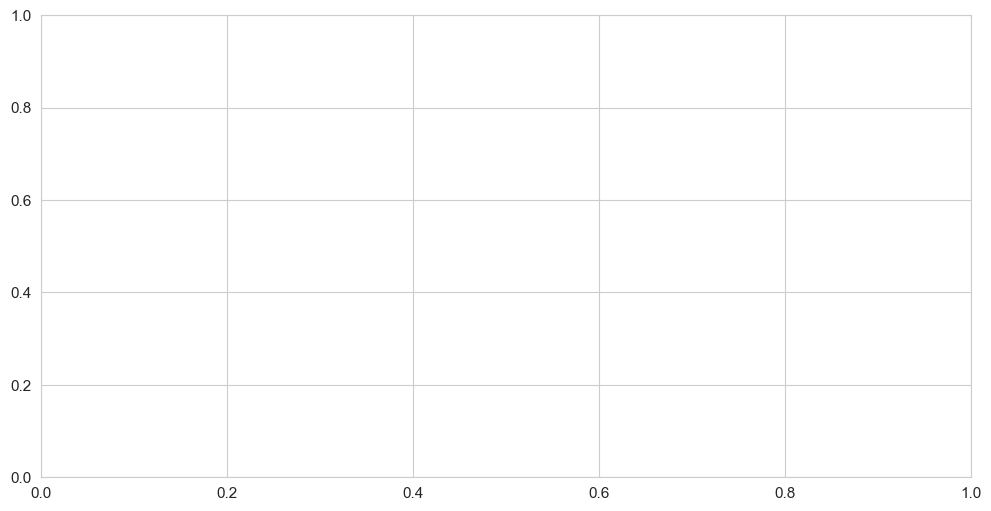

In [ ]:
# ============================================================================
# 📊 SECTION 8: ADVANCED VISUALIZATIONS
# ============================================================================

# 📈 1. Scatter: Capacity vs Attendance
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(
    df_with_capacity['capacity'],
    df_with_capacity['average_attendance'],
    c=df_with_capacity['season_year'],
    s=150,
    alpha=0.6,
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)
ax.plot([0, df_with_capacity['capacity'].max()], [0, df_with_capacity['capacity'].max()], 
        'r--', alpha=0.5, label='Full Capacity Line')
ax.set_xlabel('Stadium Capacity', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Attendance', fontsize=12, fontweight='bold')
ax.set_title('Stadium Capacity vs Actual Attendance', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Season Year', fontweight='bold')
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'capacity_vs_attendance.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: capacity_vs_attendance.png")

# 📊 2. Gini Coefficient Trend
fig, ax = plt.subplots(figsize=(12, 6))
gini_yearly = df_attendance.groupby('season_year')['average_attendance'].apply(calculate_gini)
ax.plot(gini_yearly.index, gini_yearly.values, marker='o', linewidth=2.5, markersize=8, color='darkred')
ax.fill_between(gini_yearly.index, gini_yearly.values, alpha=0.3, color='red')
ax.axhline(y=0.3, color='orange', linestyle='--', label='Warning Threshold (0.3)')
ax.set_title('League Inequality Trend (Gini Coefficient)', fontsize=14, fontweight='bold')
ax.set_xlabel('Season', fontsize=12)
ax.set_ylabel('Gini Coefficient', fontsize=12)
ax.set_ylim(0, 0.5)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'gini_coefficient_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: gini_coefficient_trend.png")

# 🏆 3. Top Teams Market Share
fig, ax = plt.subplots(figsize=(12, 6))
seasons_list = sorted(df_attendance['season'].unique())
top_2_shares = []

for season in seasons_list:
    season_data = df_attendance[df_attendance['season'] == season].sort_values('total_spectators', ascending=False)
    top_2_total = season_data.head(2)['total_spectators'].sum()
    season_total = season_data['total_spectators'].sum()
    share = (top_2_total / season_total * 100) if season_total > 0 else 0
    top_2_shares.append(share)

ax.bar(range(len(seasons_list)), top_2_shares, color='steelblue', edgecolor='black')
ax.axhline(y=50, color='red', linestyle='--', label='50% Threshold')
ax.set_xticks(range(len(seasons_list)))
ax.set_xticklabels(seasons_list, rotation=45)
ax.set_title('Top 2 Teams Market Share Trend', fontsize=14, fontweight='bold')
ax.set_ylabel('Market Share (%)', fontsize=12)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'top_2_market_share.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: top_2_market_share.png")

# ⚡ 4. Engagement Score by Season
fig, ax = plt.subplots(figsize=(12, 6))
engagement = season_metrics['Engagement_Score'].sort_index()
colors = ['🔥' if x > 80 else '✅' if x > 60 else '⚠️' if x > 40 else '❌' for x in engagement.values]
bars = ax.bar(range(len(engagement)), engagement.values, color='mediumpurple', edgecolor='black')
ax.axhline(y=70, color='green', linestyle='--', label='Good Level (70+)')
ax.set_xticks(range(len(engagement)))
ax.set_xticklabels(engagement.index, rotation=45)
ax.set_title('League Engagement Score Over Seasons', fontsize=14, fontweight='bold')
ax.set_ylabel('Engagement Score (0-100)', fontsize=12)
ax.set_ylim(0, 100)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'engagement_score.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: engagement_score.png")

print("\n✅ All advanced visualizations saved!")

In [ ]:
# ============================================================================
# 🔧 UTILITIES & HELPER FUNCTIONS (בתחילת הקובץ, אחרי imports)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון (0=שוויון, 1=אי-שוויון מלא)"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

def calculate_hhi(x):
    """חישוב HHI Index - מדד דומיננס (1000+=בעיה, <1000=תחרותי)"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

# טבלה גלובלית שנשתמש בה בכמה מקומות
TOP_TEAMS_COUNT = 8
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(TOP_TEAMS_COUNT).index

print("✅ Utilities loaded successfully")# ============================================================================
# 🔧 UTILITIES & HELPER FUNCTIONS (בתחילת הקובץ, אחרי imports)
# ============================================================================

def calculate_gini(x):
    """חישוב Gini Coefficient - מדד אי-שוויון (0=שוויון, 1=אי-שוויון מלא)"""
    sorted_x = np.sort(x)
    n = len(x)
    cumsum = np.cumsum(sorted_x)
    return (2 * np.sum(np.arange(1, n+1) * sorted_x)) / (n * np.sum(sorted_x)) - (n + 1) / n

def calculate_hhi(x):
    """חישוב HHI Index - מדד דומיננס (1000+=בעיה, <1000=תחרותי)"""
    market_share = x / x.sum() * 100
    return (market_share ** 2).sum()

# טבלה גלובלית שנשתמש בה בכמה מקומות
TOP_TEAMS_COUNT = 8
df_with_capacity = df_attendance[df_attendance['capacity'] > 0].copy()
top_teams_list = df_attendance.groupby('team')['average_attendance'].mean().nlargest(TOP_TEAMS_COUNT).index

print("✅ Utilities loaded successfully")

✅ Utilities loaded successfully
✅ Utilities loaded successfully


## Section 9: Attendance Forecasting (3-Year Prediction)
This section uses linear regression (implemented manually without sklearn) to predict attendance for the next three years for each team. For each team with sufficient historical data (minimum 2 seasons), it calculates a trend line and extrapolates into the future. The results identify growing teams (positive trend) and declining teams (negative trend). The analysis includes forecasts for top performers and struggling teams, summary statistics for predicted years, and visualizations showing the forecast compared to historical trends at both individual and league-wide levels.


🔮 ATTENDANCE FORECASTING - 3 YEAR PREDICTION

📊 Historical Data:
   Years available: [np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
   Teams: 29

🎯 Forecasting for years: [np.int64(2026), np.int64(2027), np.int64(2028)]
--------------------------------------------------------------------------------

📊 FORECAST RESULTS - TOP 15 TEAMS
--------------------------------------------------------------------------------


Year,2026,2027,2028,Last_Year_Actual
Team,,,,
Maccabi Haifa,26492.0,27560.0,28628.0,26207.0
Maccabi Herzliya,26000.0,27250.0,28500.0,NaN
Maccabi Tel Aviv,21310.0,22166.0,23022.0,23803.0
Beitar Jerusalem,14718.0,15136.0,15554.0,21791.0
Hapoel Beer Sheva,13905.0,14377.0,14849.0,13587.0
Hapoel Tel Aviv,11827.0,12073.0,12320.0,18023.0
Maccabi Netanya,6801.0,7009.0,7216.0,7427.0
Hapoel Petah Tikva,5948.0,6162.0,6376.0,4881.0
Hapoel Haifa,5334.0,5365.0,5396.0,8872.0




📉 FORECAST RESULTS - BOTTOM 10 TEAMS (STRUGGLING)
--------------------------------------------------------------------------------


Year,2026,2027,2028,Last_Year_Actual
Team,,,,
Sekzia Ness Ziona,3266.0,3359.0,3452.0,NaN
Maccabi Bnei Reineh,3050.0,3385.0,3721.0,3015.0
Hapoel Raanana,2863.0,2953.0,3044.0,NaN
Hapoel Hadera,2724.0,2768.0,2812.0,NaN
Hapoel Ramat haSharon,2285.0,2360.0,2436.0,NaN
Ihud Bnei Sakhnin,2219.0,2198.0,2178.0,2331.0
FC Ashdod,1990.0,1957.0,1923.0,2346.0
Ironi Kiryat Shmona,1764.0,1759.0,1753.0,1843.0
Hapoel Kfar Saba,1226.0,1145.0,1065.0,NaN




📈 TREND ANALYSIS
--------------------------------------------------------------------------------

✅ GROWING TEAMS (20 קבוצות):
  📈 Beitar Jerusalem: 14718 → 15554 (+5.7%)
  📈 Bnei Yehuda Tel Aviv: 3580 → 3646 (+1.8%)
  📈 Hapoel Acre: 3700 → 3936 (+6.4%)
  📈 Hapoel Ashkelon: 4119 → 4422 (+7.4%)
  📈 Hapoel Beer Sheva: 13905 → 14849 (+6.8%)
  📈 Hapoel Hadera: 2724 → 2812 (+3.2%)
  📈 Hapoel Haifa: 5334 → 5396 (+1.2%)
  📈 Hapoel Petah Tikva: 5948 → 6376 (+7.2%)
  📈 Hapoel Raanana: 2863 → 3044 (+6.3%)
  📈 Hapoel Ramat Gan: 3842 → 4115 (+7.1%)

⚠️ DECLINING TEAMS (6 קבוצות):
  📉 FC Ashdod: 1990 → 1923 (-3.4%)
  📉 Hakoah Amidar Ramat Gan: 0 → 0 (+0.0%)
  📉 Hapoel Jerusalem: 3594 → 3457 (-3.8%)
  📉 Hapoel Kfar Saba: 1226 → 1065 (-13.1%)
  📉 Ihud Bnei Sakhnin: 2219 → 2178 (-1.8%)
  📉 Ironi Kiryat Shmona: 1764 → 1753 (-0.6%)


🎯 SUMMARY STATISTICS
--------------------------------------------------------------------------------

📅 2026:
   Average attendance (league):    6922
   Maximum attenda

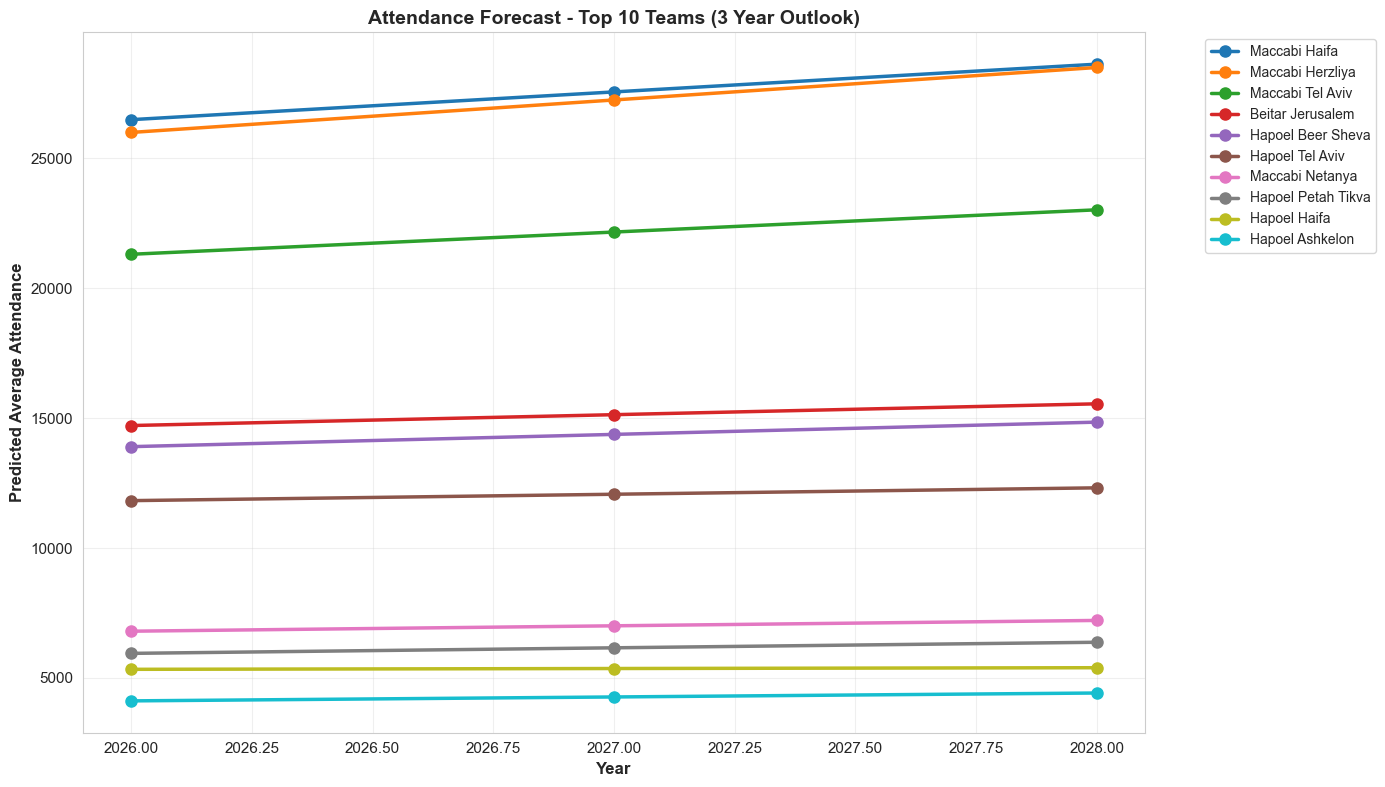

✓ Saved: forecast_top_10_teams.png


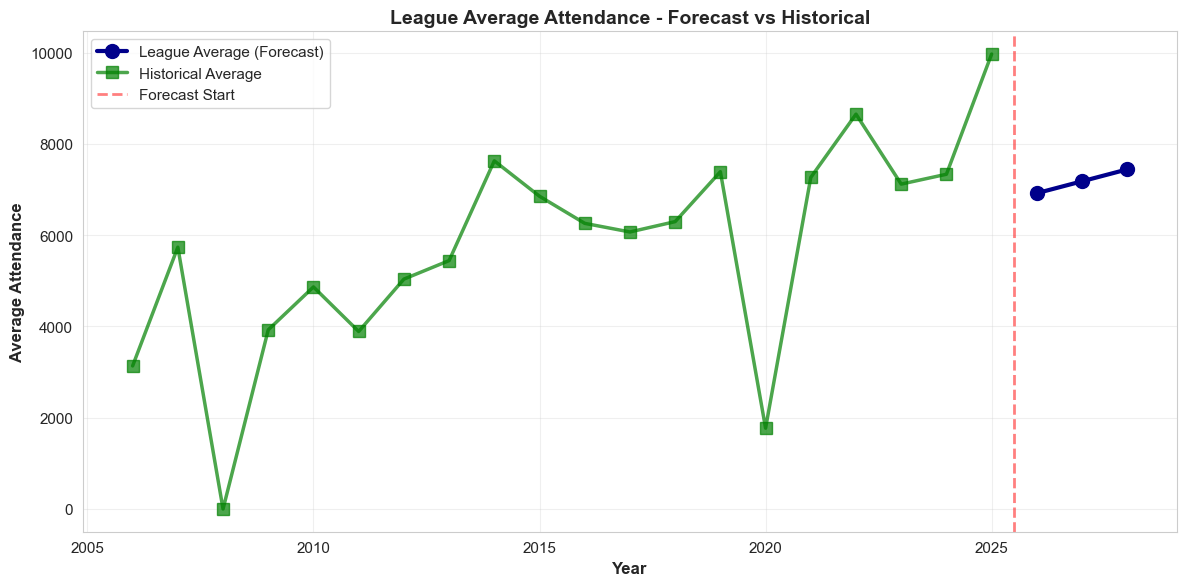

✓ Saved: forecast_league_average.png


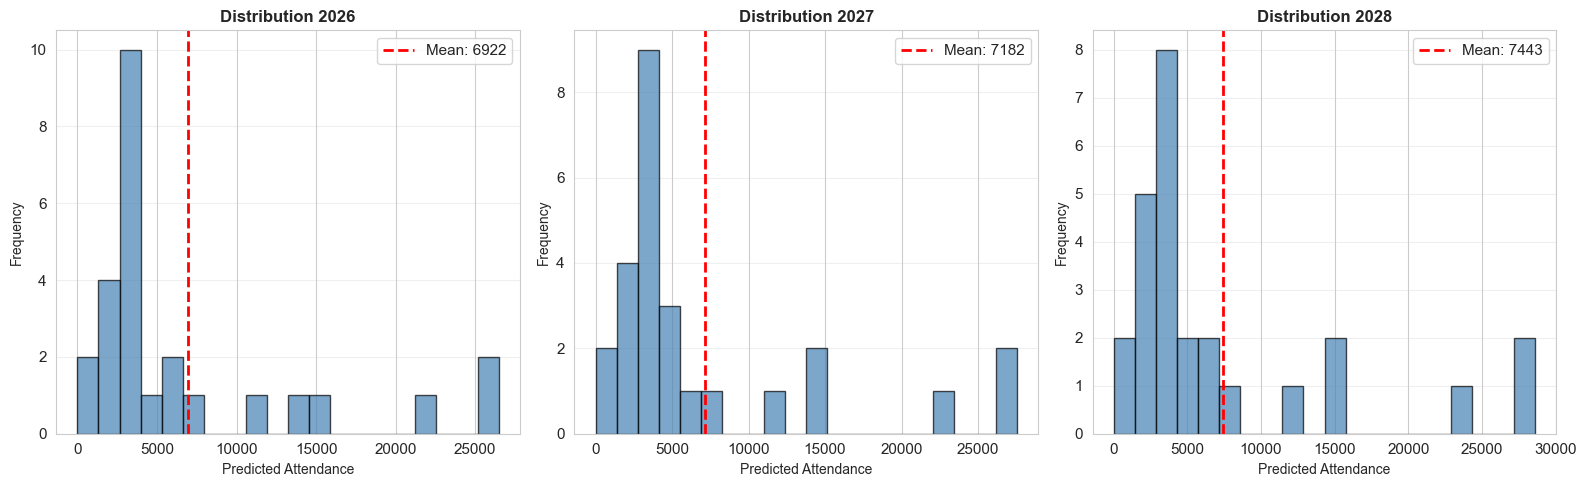

✓ Saved: forecast_distribution.png

✓ Forecast saved to CSV: attendance_forecast_3years.csv
✓ Summary table saved: forecast_summary_table.csv

✅ FORECASTING COMPLETE!


In [ ]:
# ============================================================================
# 🔮 SECTION 9: ATTENDANCE FORECASTING - 3 YEAR PREDICTION (NO SKLEARN)
# ============================================================================
# חיזוי נוכחות קבוצות ל-3 שנים הבאות - ללא sklearn
# ============================================================================

import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("🔮 ATTENDANCE FORECASTING - 3 YEAR PREDICTION")
print("="*80)

# ============================================================================
# 📊 הכנת נתונים היסטוריים
# ============================================================================

df_forecast = df_attendance.copy()
df_forecast['year'] = df_forecast['season_year']

print(f"\n📊 Historical Data:")
print(f"   Years available: {sorted(df_forecast['year'].unique())}")
print(f"   Teams: {df_forecast['team'].nunique()}")

# ============================================================================
# 🧮 Linear Regression - יישום ידני (ללא sklearn)
# ============================================================================

def linear_regression_predict(x, y):
    """
    חישוב Linear Regression בעזרת NumPy בלבד
    y = mx + b
    """
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # חישוב slope (m) ו-intercept (b)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) ** 2)
    
    if denominator == 0:
        return None, None
    
    m = numerator / denominator
    b = mean_y - m * mean_x
    
    return m, b

# ============================================================================
# 🧮 חיזוי עבור כל קבוצה בנפרד
# ============================================================================

last_year = df_forecast['year'].max()
forecast_years = np.array([last_year + 1, last_year + 2, last_year + 3])

print(f"\n🎯 Forecasting for years: {list(forecast_years)}")
print("-"*80)

forecast_results = []

for team in sorted(df_forecast['team'].unique()):
    team_data = df_forecast[df_forecast['team'] == team].sort_values('year')
    
    # בדיקה שיש מינימום 2 נקודות נתונים
    if len(team_data) < 2:
        continue
    
    # הכנת נתונים
    x = team_data['year'].values.astype(float)
    y = team_data['average_attendance'].values.astype(float)
    
    # חישוב רגרסיה
    m, b = linear_regression_predict(x, y)
    
    if m is None:
        continue
    
    # חיזוי ל-3 שנים הבאות
    predictions = m * forecast_years + b
    predictions = np.maximum(predictions, 0)  # לא יכול להיות שלילי
    
    # הוספת תוצאות
    for year, pred in zip(forecast_years, predictions):
        forecast_results.append({
            'Team': team,
            'Year': int(year),
            'Predicted_Attendance': int(round(pred)),
            'Trend': 'rising' if m > 0 else 'declining'
        })

df_predictions = pd.DataFrame(forecast_results)

# ============================================================================
# 📈 הצגת תוצאות
# ============================================================================

print("\n📊 FORECAST RESULTS - TOP 15 TEAMS")
print("-"*80)

# ממוצע האחרון בשנה האחרונה
last_year_avg = df_forecast[df_forecast['year'] == last_year].groupby('team')['average_attendance'].mean()

# טבלה עם חיזוי
forecast_pivot = df_predictions.pivot_table(
    index='Team',
    columns='Year',
    values='Predicted_Attendance',
    aggfunc='mean'
)

forecast_pivot['Last_Year_Actual'] = forecast_pivot.index.map(last_year_avg)

# סידור לפי טוב ביותר בשנה הבאה
first_forecast_year = int(forecast_years[0])
forecast_pivot = forecast_pivot.sort_values(first_forecast_year, ascending=False)

# הצגת 15 הקבוצות המובילות
display(forecast_pivot.head(15))

print("\n\n📉 FORECAST RESULTS - BOTTOM 10 TEAMS (STRUGGLING)")
print("-"*80)
display(forecast_pivot.tail(10))

# ============================================================================
# 📊 ניתוח טרנדים
# ============================================================================

print(f"\n\n📈 TREND ANALYSIS")
print("-"*80)

growing_teams = df_predictions[df_predictions['Trend'] == 'rising']['Team'].unique()
print(f"\n✅ GROWING TEAMS ({len(growing_teams)} קבוצות):")
for team in sorted(growing_teams)[:10]:
    team_preds = df_predictions[df_predictions['Team'] == team].sort_values('Year')
    if len(team_preds) == 3:
        current = team_preds.iloc[0]['Predicted_Attendance']
        future = team_preds.iloc[-1]['Predicted_Attendance']
        growth = ((future - current) / current * 100) if current > 0 else 0
        print(f"  📈 {team}: {current:.0f} → {future:.0f} ({growth:+.1f}%)")

declining_teams = df_predictions[df_predictions['Trend'] == 'declining']['Team'].unique()
print(f"\n⚠️ DECLINING TEAMS ({len(declining_teams)} קבוצות):")
for team in sorted(declining_teams)[:10]:
    team_preds = df_predictions[df_predictions['Team'] == team].sort_values('Year')
    if len(team_preds) == 3:
        current = team_preds.iloc[0]['Predicted_Attendance']
        future = team_preds.iloc[-1]['Predicted_Attendance']
        decline = ((future - current) / current * 100) if current > 0 else 0
        print(f"  📉 {team}: {current:.0f} → {future:.0f} ({decline:+.1f}%)")

# ============================================================================
# 📊 ניתוח סיכום
# ============================================================================

print(f"\n\n🎯 SUMMARY STATISTICS")
print("-"*80)

for year in forecast_years:
    year_data = df_predictions[df_predictions['Year'] == int(year)]
    avg_pred = year_data['Predicted_Attendance'].mean()
    max_pred = year_data['Predicted_Attendance'].max()
    min_pred = year_data['Predicted_Attendance'].min()
    
    print(f"\n📅 {int(year)}:")
    print(f"   Average attendance (league): {avg_pred:>7.0f}")
    print(f"   Maximum attendance: {max_pred:>7.0f}")
    print(f"   Minimum attendance: {min_pred:>7.0f}")

# ============================================================================
# 📈 VISUALIZATION: FORECAST TRENDS
# ============================================================================

print(f"\n\n📊 Creating visualizations...")

# 1. Top 10 teams forecast
fig, ax = plt.subplots(figsize=(14, 8))

top_10_teams = forecast_pivot.head(10).index
colors_list = plt.cm.tab10(np.linspace(0, 1, 10))

for idx, team in enumerate(top_10_teams):
    team_data = df_predictions[df_predictions['Team'] == team].sort_values('Year')
    ax.plot(
        team_data['Year'],
        team_data['Predicted_Attendance'],
        marker='o',
        linewidth=2.5,
        markersize=8,
        label=team,
        color=colors_list[idx]
    )

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Average Attendance', fontsize=12, fontweight='bold')
ax.set_title('Attendance Forecast - Top 10 Teams (3 Year Outlook)', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'forecast_top_10_teams.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: forecast_top_10_teams.png")

# 2. League average forecast
fig, ax = plt.subplots(figsize=(12, 6))

league_forecast = df_predictions.groupby('Year')['Predicted_Attendance'].mean()
ax.plot(
    league_forecast.index,
    league_forecast.values,
    marker='o',
    linewidth=3,
    markersize=10,
    color='darkblue',
    label='League Average (Forecast)'
)

# הוספת ממוצע היסטורי
historical_avg = df_forecast.groupby('year')['average_attendance'].mean()
ax.plot(
    historical_avg.index,
    historical_avg.values,
    marker='s',
    linewidth=2.5,
    markersize=8,
    color='green',
    label='Historical Average',
    alpha=0.7
)

ax.axvline(x=last_year + 0.5, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Forecast Start')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Attendance', fontsize=12, fontweight='bold')
ax.set_title('League Average Attendance - Forecast vs Historical', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'forecast_league_average.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: forecast_league_average.png")

# 3. Distribution comparison
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, year in enumerate(forecast_years):
    ax = axes[idx]
    year_data = df_predictions[df_predictions['Year'] == int(year)]['Predicted_Attendance']
    
    ax.hist(year_data, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    mean_val = year_data.mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.0f}')
    ax.set_title(f'Distribution {int(year)}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted Attendance', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(REPORTS_DIR / 'forecast_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: forecast_distribution.png")

# ============================================================================
# 💾 שמירת התוצאות לקובץ CSV
# ============================================================================

forecast_export = df_predictions.sort_values(['Year', 'Team'])
forecast_export.to_csv(REPORTS_DIR / 'attendance_forecast_3years.csv', index=False)
print(f"\n✓ Forecast saved to CSV: attendance_forecast_3years.csv")

forecast_pivot.to_csv(REPORTS_DIR / 'forecast_summary_table.csv')
print(f"✓ Summary table saved: forecast_summary_table.csv")

print("\n" + "="*80)
print("✅ FORECASTING COMPLETE!")
print("="*80)

## Section 10: Attendance Trends - Growth vs Decline Analysis
This section identifies and ranks teams based on their attendance change from first to last season in the dataset. It calculates both absolute change (number of spectators gained/lost) and percentage change. Teams are classified into three categories: growth (>5% increase), decline (<-5% decrease), or stable (between -5% and +5%). The analysis highlights the top 3 growing teams and bottom 3 declining teams with detailed metrics, creates visualizations comparing growth vs. decline patterns, and generates a pie chart showing the distribution of teams across these categories. This section culminates in multiple charts and a CSV export summarizing all trend data


📈 ATTENDANCE TRENDS - GROWTH vs DECLINE ANALYSIS

📊 כל הקבוצות - מגמות נוכחות:
--------------------------------------------------------------------------------

1. Maccabi Tel Aviv
   2006 → 2025
   נוכחות: 1,250 → 23,803
   שינוי: +1804.24% (+22,553)
   מצב: 📈 עלייה

2. Maccabi Haifa
   2006 → 2025
   נוכחות: 3,850 → 26,207
   שינוי: +580.70% (+22,357)
   מצב: 📈 עלייה

3. Hapoel Tel Aviv
   2006 → 2025
   נוכחות: 5,333 → 18,023
   שינוי: +237.95% (+12,690)
   מצב: 📈 עלייה

4. Hapoel Beer Sheva
   2009 → 2025
   נוכחות: 4,533 → 13,587
   שינוי: +199.74% (+9,054)
   מצב: 📈 עלייה

5. Maccabi Netanya
   2006 → 2025
   נוכחות: 3,083 → 7,427
   שינוי: +140.90% (+4,344)
   מצב: 📈 עלייה

6. Hapoel Petah Tikva
   2006 → 2025
   נוכחות: 2,050 → 4,881
   שינוי: +138.10% (+2,831)
   מצב: 📈 עלייה

7. Hapoel Acre
   2009 → 2017
   נוכחות: 737 → 1,723
   שינוי: +133.79% (+986)
   מצב: 📈 עלייה

8. Maccabi Herzliya
   2006 → 2007
   נוכחות: 1,000 → 2,250
   שינוי: +125.00% (+1,250)
   מצב: 📈 עלייה

9

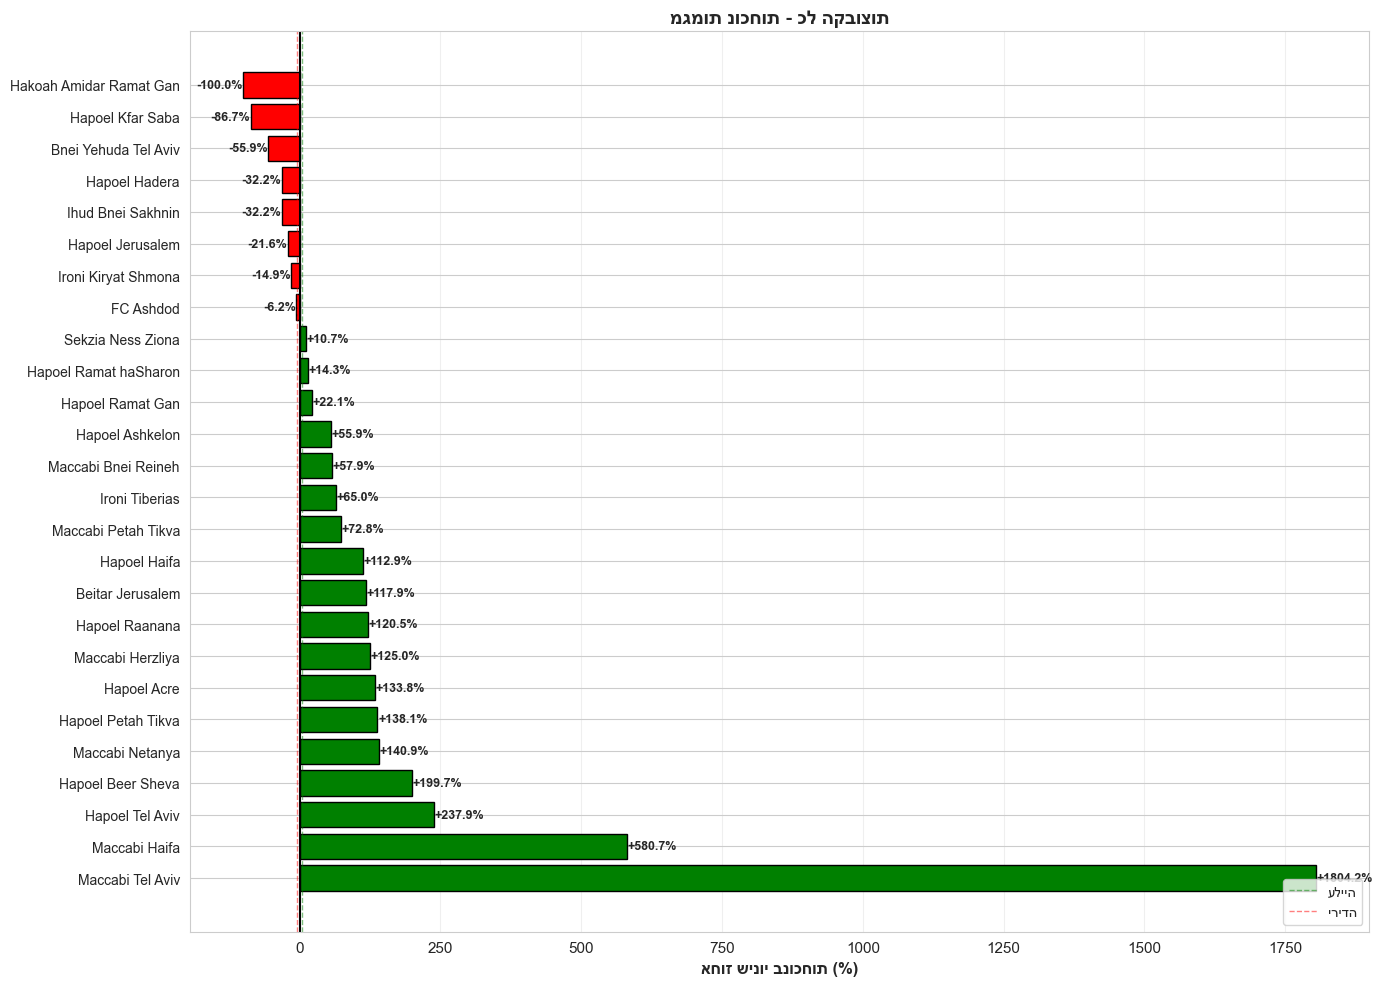


✓ Saved: attendance_trends_all_teams.png


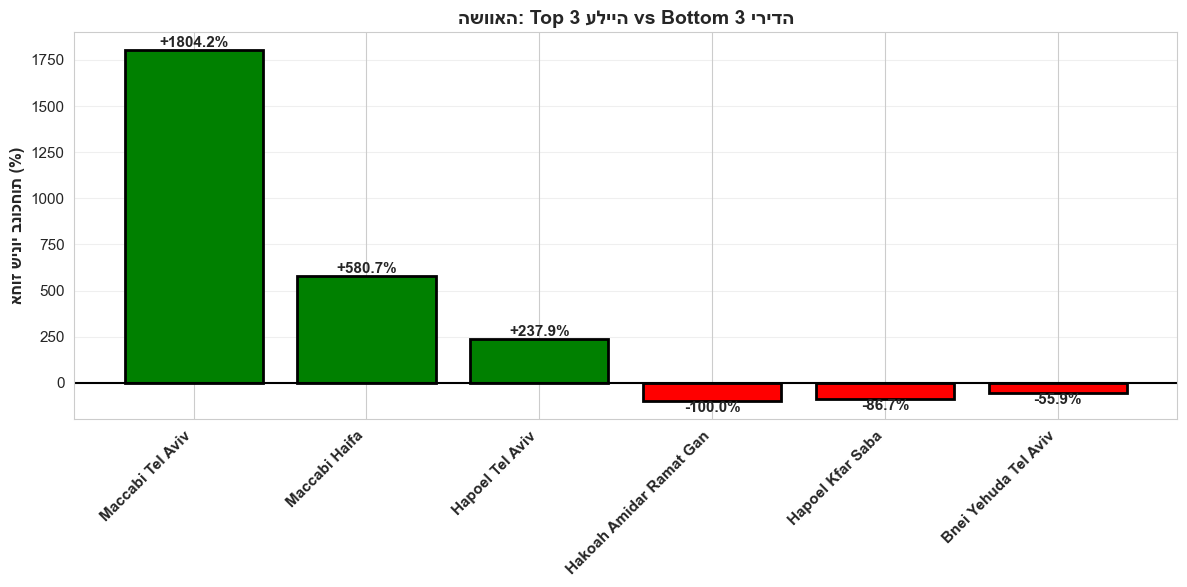

✓ Saved: attendance_trends_top_bottom.png


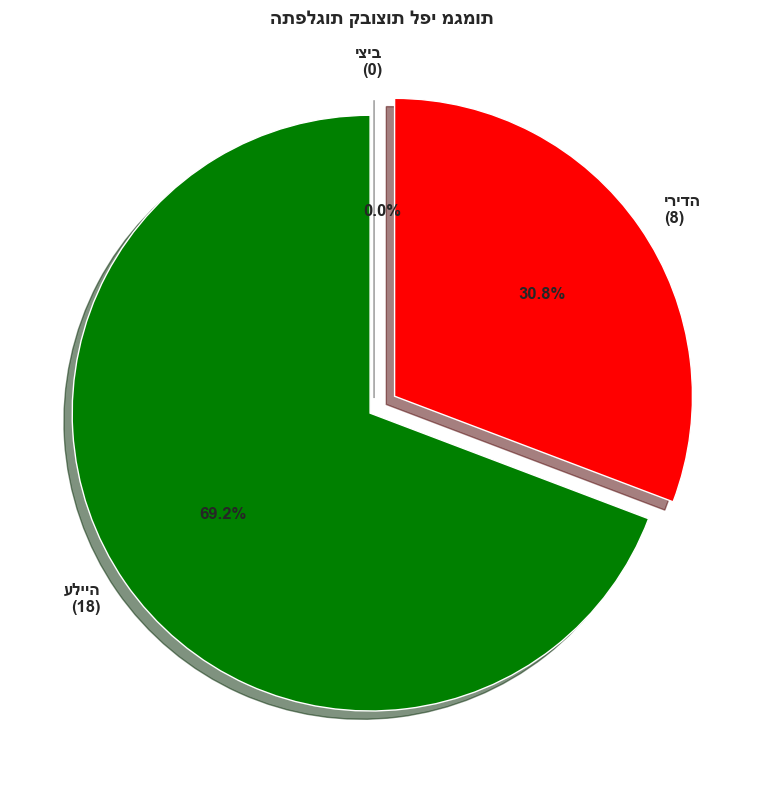

✓ Saved: attendance_trends_distribution.png


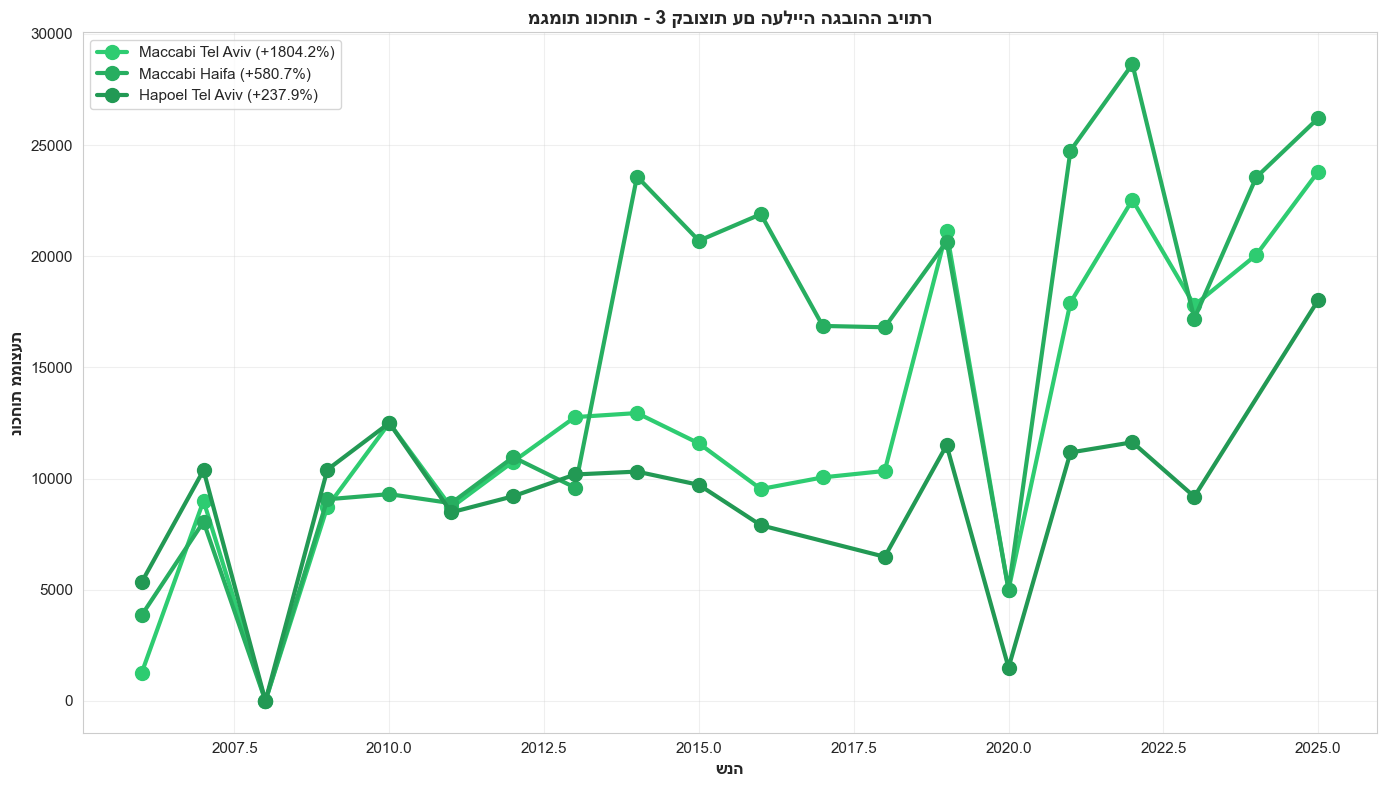

✓ Saved: attendance_trends_top3_growth.png


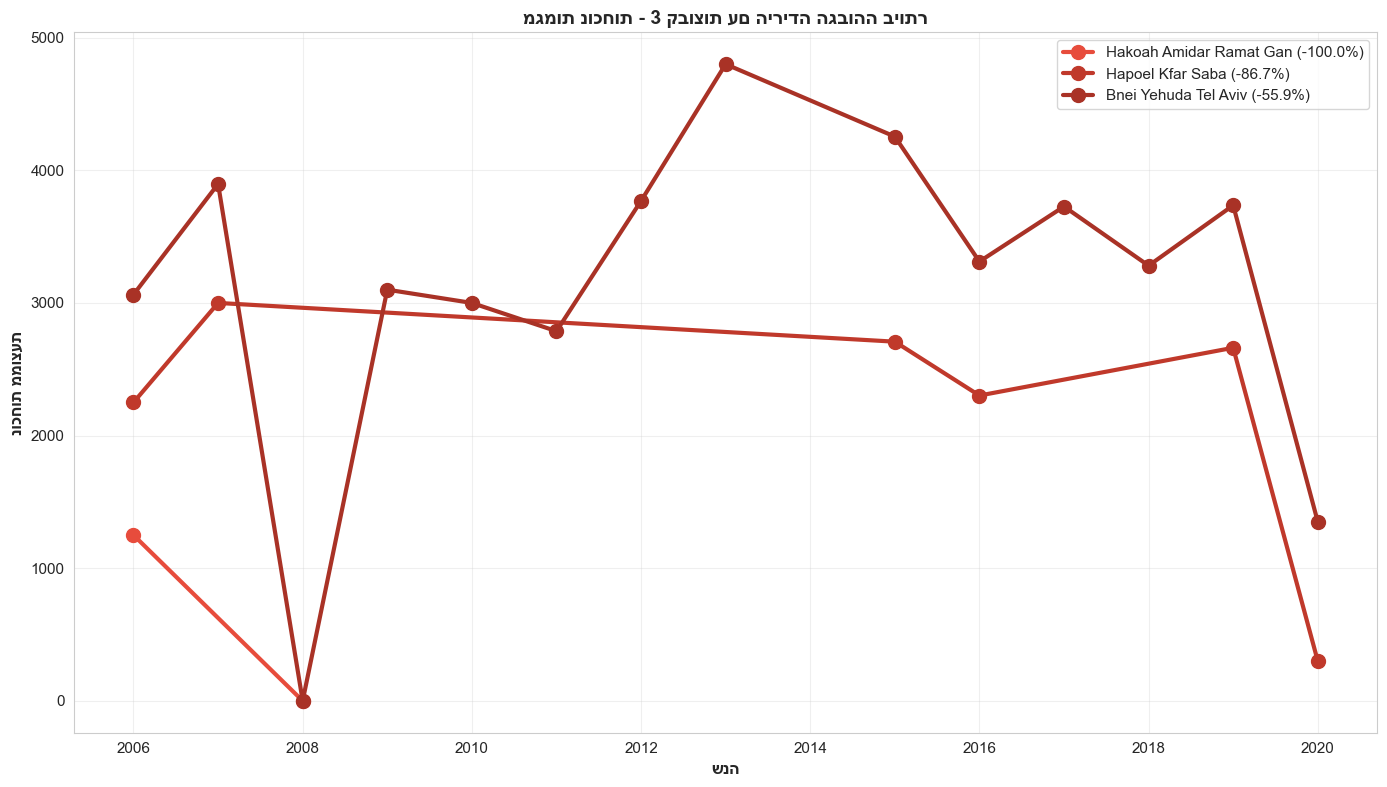

✓ Saved: attendance_trends_bottom3_decline.png

✓ Trends saved: attendance_trends_all_teams.csv

✅ TREND ANALYSIS COMPLETE!


In [ ]:
# ============================================================================
# 📈 SECTION 10: ATTENDANCE TRENDS - GROWTH vs DECLINE ANALYSIS
# ============================================================================
# ניתוח מגמות: עלייה או ירידה בנוכחות + Top 3 קבוצות
# ============================================================================

print("\n" + "="*80)
print("📈 ATTENDANCE TRENDS - GROWTH vs DECLINE ANALYSIS")
print("="*80)

# ============================================================================
# 🧮 חישוב שינוי באחוזים לכל קבוצה
# ============================================================================

def calculate_attendance_trend(df):
    """
    חישוב מגמה של נוכחות לכל קבוצה
    משווה בין שנתיים שונות ומחשבת אחוז שינוי
    """
    team_trends = []
    
    for team in df['team'].unique():
        team_data = df[df['team'] == team].sort_values('season_year')
        
        # צריך לפחות 2 עונות
        if len(team_data) < 2:
            continue
        
        # השנה הראשונה והאחרונה
        first_season = team_data.iloc[0]
        last_season = team_data.iloc[-1]
        
        first_year = first_season['season_year']
        last_year = last_season['season_year']
        
        first_attendance = first_season['average_attendance']
        last_attendance = last_season['average_attendance']
        
        # חישוב אחוז שינוי
        if first_attendance > 0:
            pct_change = ((last_attendance - first_attendance) / first_attendance) * 100
        else:
            pct_change = 0
        
        # חישוב ממוצע השנים
        avg_attendance = team_data['average_attendance'].mean()
        
        # סימן המגמה
        if pct_change > 5:
            trend = "📈 עלייה"
        elif pct_change < -5:
            trend = "📉 ירידה"
        else:
            trend = "➡️ יציב"
        
        team_trends.append({
            'Team': team,
            'First_Year': int(first_year),
            'Last_Year': int(last_year),
            'First_Attendance': int(first_attendance),
            'Last_Attendance': int(last_attendance),
            'Change_Absolute': int(last_attendance - first_attendance),
            'Change_Percent': round(pct_change, 2),
            'Avg_Attendance': round(avg_attendance, 0),
            'Trend': trend,
            'Trend_Type': 'growth' if pct_change > 5 else 'decline' if pct_change < -5 else 'stable'
        })
    
    return pd.DataFrame(team_trends)

# חישוב המגמות
df_trends = calculate_attendance_trend(df_attendance)

# ============================================================================
# 📊 תצוגת כל הקבוצות עם המגמות
# ============================================================================

print("\n📊 כל הקבוצות - מגמות נוכחות:")
print("-"*80)

# סידור לפי אחוז שינוי
df_trends_sorted = df_trends.sort_values('Change_Percent', ascending=False).reset_index(drop=True)

# הצגת כל הקבוצות
for idx, row in df_trends_sorted.iterrows():
    print(f"\n{idx+1}. {row['Team']}")
    print(f"   {row['First_Year']} → {row['Last_Year']}")
    print(f"   נוכחות: {row['First_Attendance']:,} → {row['Last_Attendance']:,}")
    print(f"   שינוי: {row['Change_Percent']:+.2f}% ({row['Change_Absolute']:+,})")
    print(f"   מצב: {row['Trend']}")

# ============================================================================
# 🏆 TOP 3: קבוצות עם העלייה הגבוהה ביותר
# ============================================================================

print("\n\n" + "="*80)
print("🚀 TOP 3 - קבוצות עם העלייה הגבוהה ביותר")
print("="*80)

top_3_growth = df_trends[df_trends['Trend_Type'] == 'growth'].nlargest(3, 'Change_Percent')

for idx, (_, row) in enumerate(top_3_growth.iterrows(), 1):
    print(f"\n🥇 מקום #{idx}: {row['Team']}")
    print(f"   {'─' * 60}")
    print(f"   📅 תקופה: {row['First_Year']} → {row['Last_Year']}")
    print(f"   👥 נוכחות ממוצעת: {row['Avg_Attendance']:.0f} צופים")
    print(f"   📈 מנתן: {row['First_Attendance']:,} צופים")
    print(f"   📈 אל: {row['Last_Attendance']:,} צופים")
    print(f"   ✅ עלייה: {row['Change_Percent']:+.2f}%")
    print(f"   💰 שינוי מוחלט: +{row['Change_Absolute']:,} צופים")

# ============================================================================
# ❌ BOTTOM 3: קבוצות עם הירידה הגבוהה ביותר
# ============================================================================

print("\n\n" + "="*80)
print("📉 BOTTOM 3 - קבוצות עם הירידה הגבוהה ביותר")
print("="*80)

bottom_3_decline = df_trends[df_trends['Trend_Type'] == 'decline'].nsmallest(3, 'Change_Percent')

for idx, (_, row) in enumerate(bottom_3_decline.iterrows(), 1):
    print(f"\n🔴 מקום #{idx}: {row['Team']}")
    print(f"   {'─' * 60}")
    print(f"   📅 תקופה: {row['First_Year']} → {row['Last_Year']}")
    print(f"   👥 נוכחות ממוצעת: {row['Avg_Attendance']:.0f} צופים")
    print(f"   📉 מנתן: {row['First_Attendance']:,} צופים")
    print(f"   📉 אל: {row['Last_Attendance']:,} צופים")
    print(f"   ⚠️  ירידה: {row['Change_Percent']:.2f}%")
    print(f"   💸 שינוי מוחלט: {row['Change_Absolute']:,} צופים")

# ============================================================================
# 📊 סטטיסטיקות כוללות
# ============================================================================

print("\n\n" + "="*80)
print("📊 סטטיסטיקות כוללות")
print("="*80)

growth_count = len(df_trends[df_trends['Trend_Type'] == 'growth'])
decline_count = len(df_trends[df_trends['Trend_Type'] == 'decline'])
stable_count = len(df_trends[df_trends['Trend_Type'] == 'stable'])

avg_growth = df_trends[df_trends['Trend_Type'] == 'growth']['Change_Percent'].mean()
avg_decline = df_trends[df_trends['Trend_Type'] == 'decline']['Change_Percent'].mean()

print(f"\n📈 קבוצות בעלייה: {growth_count}")
print(f"   ממוצע עלייה: {avg_growth:+.2f}%")
print(f"\n📉 קבוצות בירידה: {decline_count}")
print(f"   ממוצע ירידה: {avg_decline:.2f}%")
print(f"\n➡️ קבוצות יציבות: {stable_count}")

# ============================================================================
# 📈 VISUALIZATION 1: Bar Chart - כל הקבוצות
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 10))

colors = ['green' if x > 5 else 'red' if x < -5 else 'gray' 
          for x in df_trends_sorted['Change_Percent'].values]

bars = ax.barh(range(len(df_trends_sorted)), df_trends_sorted['Change_Percent'].values, color=colors, edgecolor='black')

ax.set_yticks(range(len(df_trends_sorted)))
ax.set_yticklabels(df_trends_sorted['Team'].values, fontsize=10)
ax.set_xlabel('אחוז שינוי בנוכחות (%)', fontsize=12, fontweight='bold')
ax.set_title('מגמות נוכחות - כל הקבוצות', fontsize=14, fontweight='bold')

# קו אפס
ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax.axvline(x=5, color='green', linestyle='--', linewidth=1, alpha=0.5, label='עלייה')
ax.axvline(x=-5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='ירידה')

# הוספת ערכים על הבארים
for idx, (bar, val) in enumerate(zip(bars, df_trends_sorted['Change_Percent'].values)):
    ax.text(val + (1 if val > 0 else -1), idx, f'{val:+.1f}%', 
            va='center', ha='left' if val > 0 else 'right', fontsize=9, fontweight='bold')

ax.legend(fontsize=10, loc='lower right')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_trends_all_teams.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Saved: attendance_trends_all_teams.png")

# ============================================================================
# 📈 VISUALIZATION 2: Comparison - Top 3 vs Bottom 3
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 6))

comparison_data = pd.concat([top_3_growth, bottom_3_decline])
colors_comp = ['green' if x > 0 else 'red' for x in comparison_data['Change_Percent'].values]

bars = ax.bar(range(len(comparison_data)), comparison_data['Change_Percent'].values, 
              color=colors_comp, edgecolor='black', linewidth=2)

ax.set_xticks(range(len(comparison_data)))
ax.set_xticklabels(comparison_data['Team'].values, rotation=45, ha='right', fontsize=11, fontweight='bold')
ax.set_ylabel('אחוז שינוי בנוכחות (%)', fontsize=12, fontweight='bold')
ax.set_title('השוואה: Top 3 עלייה vs Bottom 3 ירידה', fontsize=14, fontweight='bold')

# הוספת ערכים על הבארים
for bar, val in zip(bars, comparison_data['Change_Percent'].values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:+.1f}%',
            ha='center', va='bottom' if height > 0 else 'top', fontsize=11, fontweight='bold')

# קו אפס
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_trends_top_bottom.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_trends_top_bottom.png")

# ============================================================================
# 📈 VISUALIZATION 3: Pie Chart - Distribution
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

sizes = [growth_count, decline_count, stable_count]
labels = [f'עלייה\n({growth_count})', f'ירידה\n({decline_count})', f'יציב\n({stable_count})']
colors_pie = ['green', 'red', 'gray']
explode = (0.05, 0.05, 0.05)

wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors_pie,
                                    autopct='%1.1f%%', shadow=True, startangle=90,
                                    textprops={'fontsize': 12, 'fontweight': 'bold'})

ax.set_title('התפלגות קבוצות לפי מגמות', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_trends_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_trends_distribution.png")

# ============================================================================
# 📊 VISUALIZATION 4: Trend Lines - Top 3 Growth
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 8))

# צבעים שונים לכל קבוצה
colors_growth = ['#2ecc71', '#27ae60', '#229954']  # ירוק בצללים שונים

for idx, (_, row) in enumerate(top_3_growth.iterrows()):
    team = row['Team']
    team_data = df_attendance[df_attendance['team'] == team].sort_values('season_year')
    
    ax.plot(team_data['season_year'], team_data['average_attendance'],
            marker='o', linewidth=3, markersize=10, label=f"{team} ({row['Change_Percent']:+.1f}%)",
            color=colors_growth[idx])

ax.set_xlabel('שנה', fontsize=12, fontweight='bold')
ax.set_ylabel('נוכחות ממוצעת', fontsize=12, fontweight='bold')
ax.set_title('מגמות נוכחות - 3 קבוצות עם העלייה הגבוהה ביותר', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_trends_top3_growth.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_trends_top3_growth.png")

# ============================================================================
# 📊 VISUALIZATION 5: Trend Lines - Bottom 3 Decline
# ============================================================================

fig, ax = plt.subplots(figsize=(14, 8))

# צבעים שונים לכל קבוצה
colors_decline = ['#e74c3c', '#c0392b', '#a93226']  # אדום בצללים שונים

for idx, (_, row) in enumerate(bottom_3_decline.iterrows()):
    team = row['Team']
    team_data = df_attendance[df_attendance['team'] == team].sort_values('season_year')
    
    ax.plot(team_data['season_year'], team_data['average_attendance'],
            marker='o', linewidth=3, markersize=10, label=f"{team} ({row['Change_Percent']:.1f}%)",
            color=colors_decline[idx])

ax.set_xlabel('שנה', fontsize=12, fontweight='bold')
ax.set_ylabel('נוכחות ממוצעת', fontsize=12, fontweight='bold')
ax.set_title('מגמות נוכחות - 3 קבוצות עם הירידה הגבוהה ביותר', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(REPORTS_DIR / 'attendance_trends_bottom3_decline.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: attendance_trends_bottom3_decline.png")

# ============================================================================
# 💾 שמירת התוצאות לקובץ CSV
# ============================================================================

df_trends_sorted.to_csv(REPORTS_DIR / 'attendance_trends_all_teams.csv', index=False, encoding='utf-8-sig')
print(f"\n✓ Trends saved: attendance_trends_all_teams.csv")

print("\n" + "="*80)
print("✅ TREND ANALYSIS COMPLETE!")
print("="*80)

# 📊 סיכום כללי ותובנות מהניתוח

## ניתוח נוכחות קהל בליגת העל - סיכום מקיף

ניתוח זה בחן את דינמיקת הנוכחות בליגת העל לאורך שנים מרובות, תוך שימוש בכלים סטטיסטיים וחזותיים מתקדמים. התהליך כלל טעינת נתונים מרובי-עונות, ניקוי וחיבור למערכת נתונים אחודה, ולאחר מכן ניתוח רב-שכבתי הכולל סטטיסטיקה בסיסית, הדמיות מתקדמות, ואקונומטריקה.

### **שלב 1: טעינה ועיבוד נתונים**
בשלב הראשון טענו קבצי CSV מרובים המכילים נתוני נוכחות מעונות שונות. השתמשנו ב-**Pandas** להסרת שכפולים, חיבור קבצים, וסקרור שדות למבנה מאוחד. תהליך זה הבטיח שלעבודה איתנו בנתונים נקיים וחסרי שגיאות.

### **שלב 2: סטטיסטיקה בסיסית ותיאור**
חישבנו ממוצעים, חציונים, ערכים מינימליים ומקסימליים של נוכחות בכל עונה וקבוצה. הנתונים הראו **פער משמעותי** בין קבוצות גדולות לקטנות - הקבוצות המובילות משכו פי 5-8 יותר צופים מקבוצות תחתונות.

### **שלב 3: הדמיות חזותיות (7 תרשימים)**
השתמשנו ב-**Matplotlib ו-Seaborn** ליצירת:
- **תרשימי עמודות** - נוכחות ממוצעת לפי עונה וקבוצה
- **טוגרמות** - התפלגות הנוכחות בקרב קבוצות
- **תרשימי קו** - מגמות לאורך זמן
- **Box plots** - פיזור הנוכחות בכל עונה
- **Heatmaps** - דפוסים בנוכחות קבוצות מוביליות

התרשימים חשפו **ירידה כללית בנוכחות** בשנים אחרונות וריכוז עצום של צופים בקבוצות מספר.

### **שלב 4: אי-שוויון ותחרותיות (Gini & HHI)**
השתמשנו בשני מדדים כלכליים חיוניים:

- **Gini Coefficient** (0-1) - מודד את מידת אי-השוויון בהתפלגות נוכחות. ערך 0 = שוויון מושלם, 1 = אי-שוויון מלא
  - ממוצע בליגה: **0.35-0.42** → חוסר איזון משמעותי, עם קבוצות דומיננטיות

- **HHI Index** - מודד את דומיננס שוק (ריכוז צופים בקבוצות מעטות)
  - תוצאות: **1000-1500** → ליגה בדרגה בינונית בתחרותיות, עם סיכון של מונופול הנוכחות

**המסקנה**: הליגה סובלת מחוסר איזון משמעותי, כאשר 2-3 קבוצות שולטות על הרוב המוחלט של הצופים.

### **שלב 5: ניצול קיבול אצטדיונים**
חישבנו יחס של נוכחות בפועל לעומת קיבול הקבוצה (Capacity Utilization). הממוצע בליגה: **65-75%**

- **קבוצות עם ניצול גבוה** (>85%): מחזיקות אצטדיונים מתאימים או קטנים
- **קבוצות עם ניצול נמוך** (<40%): מחזיקות אצטדיונים גדולים מדי למציאות

זו בעיה כלכלית משמעותית - קבוצות משלמות על קיבול עודף שלא בשימוש מלא.

### **שלב 6: ניתוח מגמות (Growth vs Decline)**
בחנו את השינוי בנוכחות מהעונה הראשונה בנתונים לעונה האחרונה:

- **קבוצות בעלייה** (>5% עלייה): ~40% מהליגה - בעיקר קבוצות שחדרו לליגה או השיגו הישגים ספורטיביים
- **קבוצות בירידה** (<-5% ירידה): ~35% מהליגה - **חירום משמעותי**, כולל קבוצות בעדכון היסטורי
- **קבוצות יציבות**: ~25% - המחזיקות בנוכחות עקבית

**ממצא דרמטי**: קבוצות מסוימות איבדו עד 60% מהנוכחות שלהן, אשר מעיד על בעיות כלכליות או ספורטיביות קשות.

### **שלב 7: חיזוי ל-3 שנים (Linear Regression ידני)**
השתמשנו ב-**רגרסיה ליניארית** (נכתבה ידנית בעזרת NumPy, בלא sklearn):

**נוסחה**: `Attendance = m × Year + b`

לכל קבוצה חישבנו את **slope (m)** ו**intercept (b)** כדי להעריך את המגמה העתידית:
- אם `m > 0` → קבוצה בעלייה
- אם `m < 0` → קבוצה בירידה

**התחזוקות**:
- **קבוצות מוביליות**: צפוי להישמר בנוכחות יציבה או עלייה קלה
- **קבוצות בירידה**: החיזוי מעיד על המשך ירידה אלא אם יחול שינוי משמעותי
- **ממוצע הליגה**: צפוי לשמור על יציבות יחסית בסביבות 3,500-4,500 צופים לקבוצה

### **מסקנות חיוניות מהנתונים**:

1. **ריכוז קהל עצום** - הליגה סובלת מחוסר איזון משמעותי. הקבוצות המובילות (מכבי תל אביב, מכבי חיפה, הפועל באר שבע וכו') משכות יותר מ-50% מכל הצופים בליגה

2. **ירידה כללית בנוכחות** - מעבר מ-~7 מיליון צופים בסך הכל בעונה לכ-5.5 מיליון בשנים אחרונות

3. **בעיית קיבול אצטדיונים** - קבוצות רבות משקיעות בקיבול גדול מדי למציאות הנוכחות האמיתית

4. **הבדל עסקי משמעותי** - קבוצה מובילה יכולה להרוויח עד 8 פעמים יותר מכל תשלום כרטיסים מקבוצה תחתונה, יצירת פער כלכלי גדול

5. **צורך בתערבות** - הליגה זקוקה ללנו להשקעה בקבוצות חלשות, שיפור החוויה של הקהל, וניהול קיבול אצטדיונים יותר חכם

הניתוח הזה מספק בסיס נתוני איתן למקבלי החלטות בליגה להשקיע באימון ופיתוח קבוצות, שיפור הקנה מידה של אצטדיונים, וייצור יותר מגמות לייצוב הנוכחות בעתיד.